In [2]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Igbogila.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      22.5      33.9        1.07        9.871389             17.3   
1979-02-01      22.4      34.9        1.69        9.749444             17.3   
1979-03-01      23.1      34.9        1.91        9.983056             18.2   
1979-04-01      22.8      33.2        1.97        9.765556             17.3   
1979-05-01      21.9      31.4        1.47       10.050278             18.9   
1979-06-01      21.0      29.5        1.61        9.020833             13.9   
1979-07-01      21.0      28.4        1.75        7.789167             11.8   

             ETo  
Date              
1979-01-01  4.07  
1979-02-01  4.70  
1979-03-01  5.03  
1979-04-01  4.72  
1979-05-01  4.46  
1979-06-01  3.59  
1979-07-01  3.23

### Checking for missing values

In [3]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [4]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

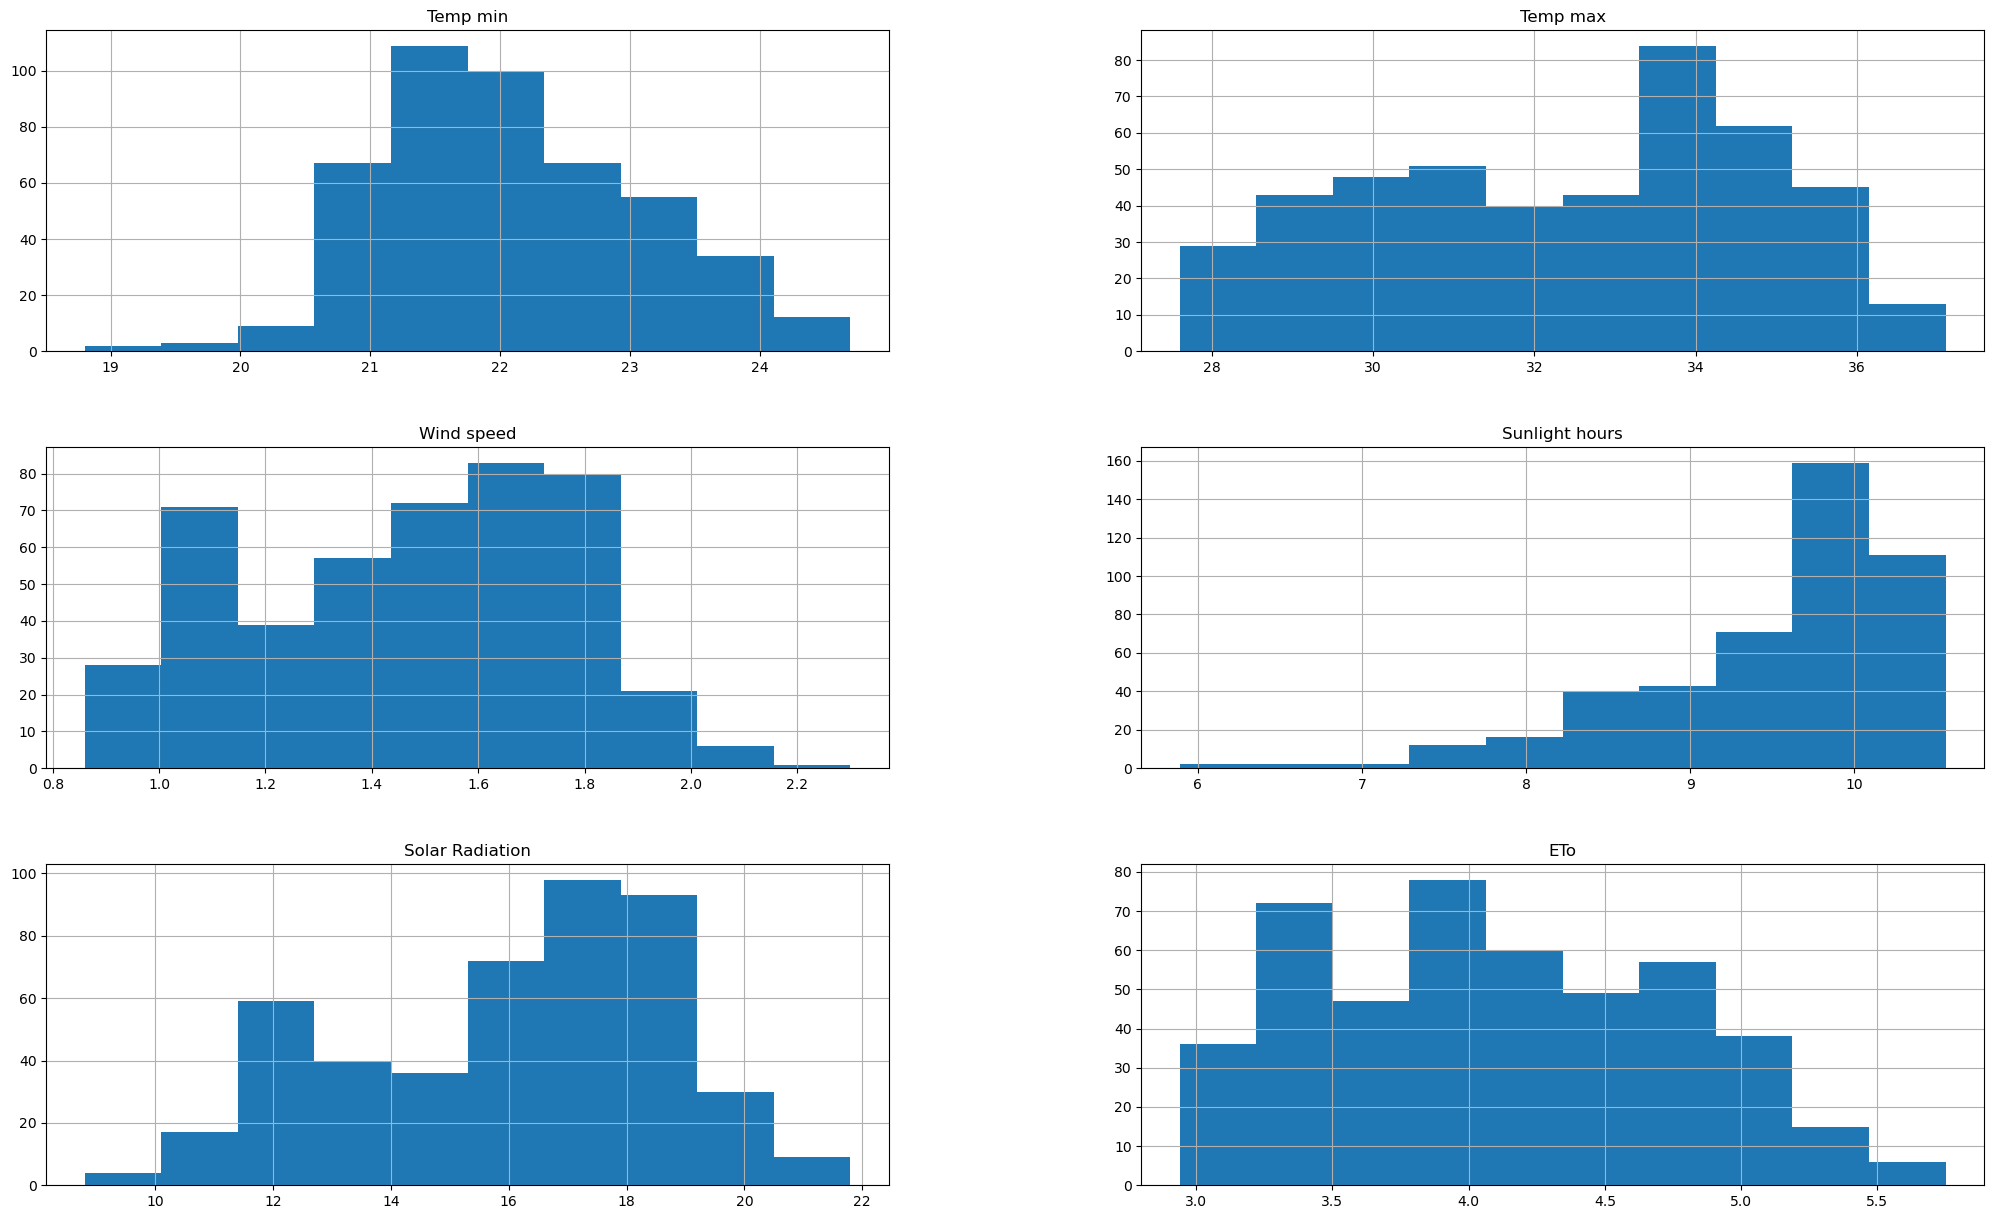

In [5]:
data.hist(figsize=(25,15))

<AxesSubplot:>

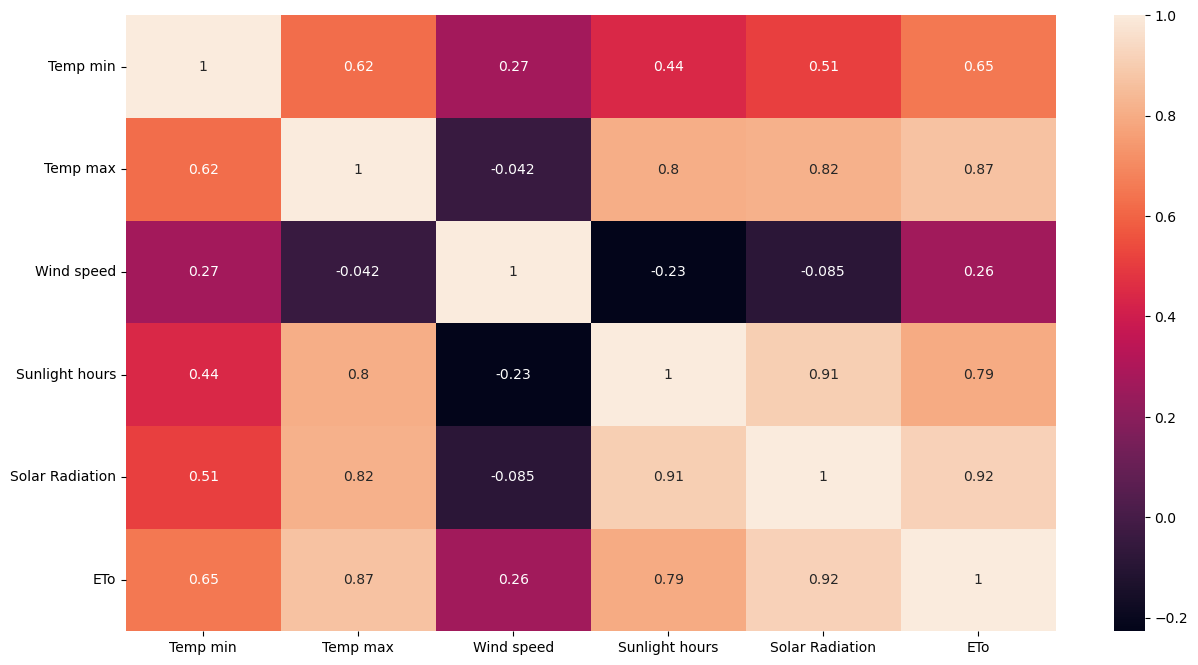

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

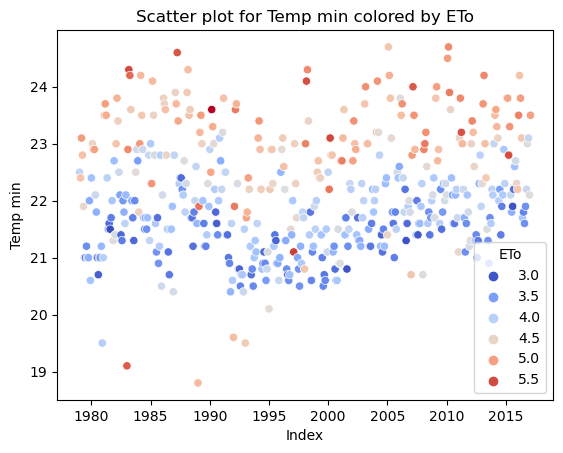

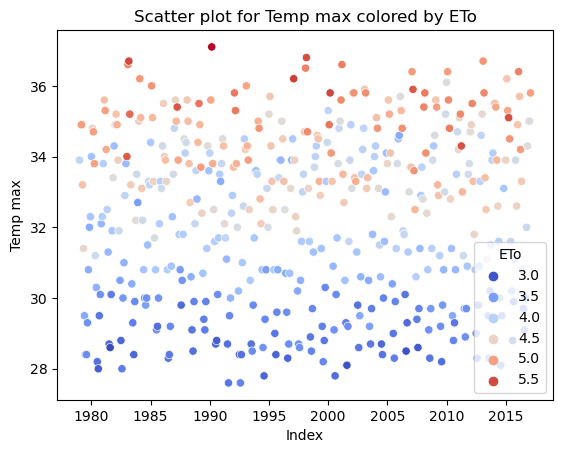

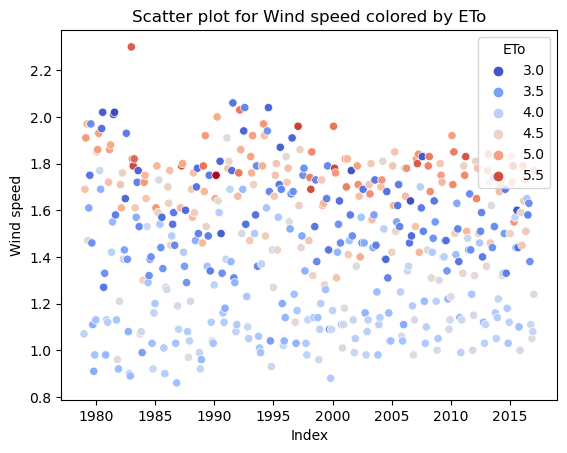

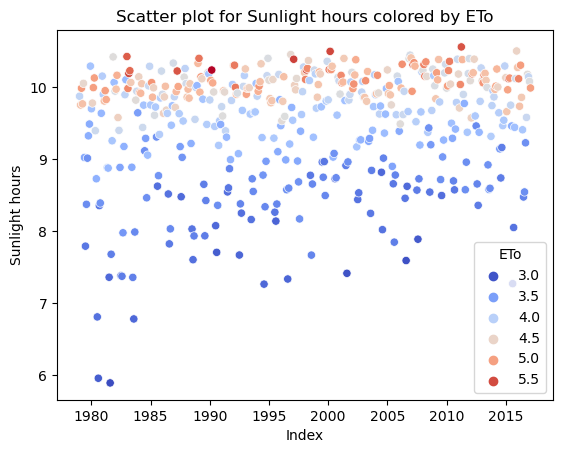

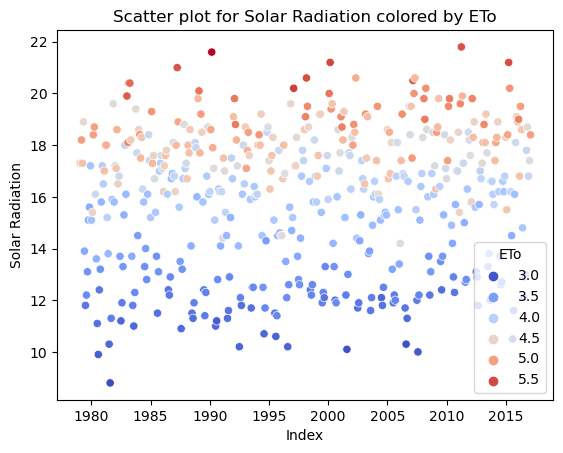

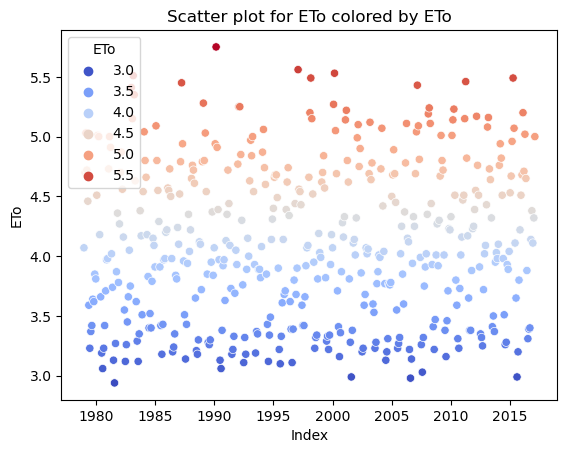

In [7]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

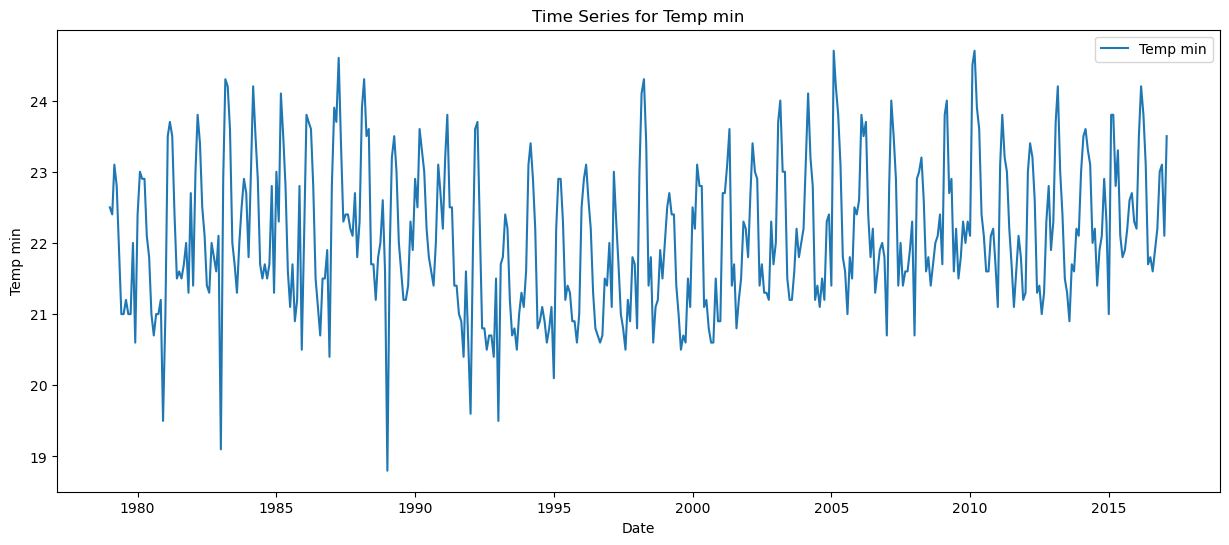

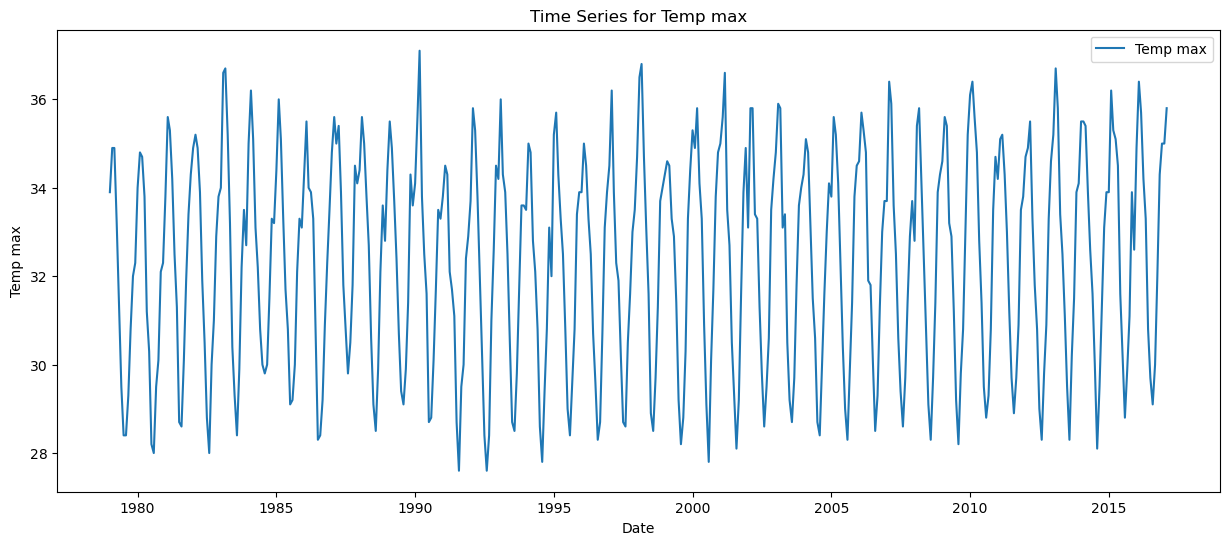

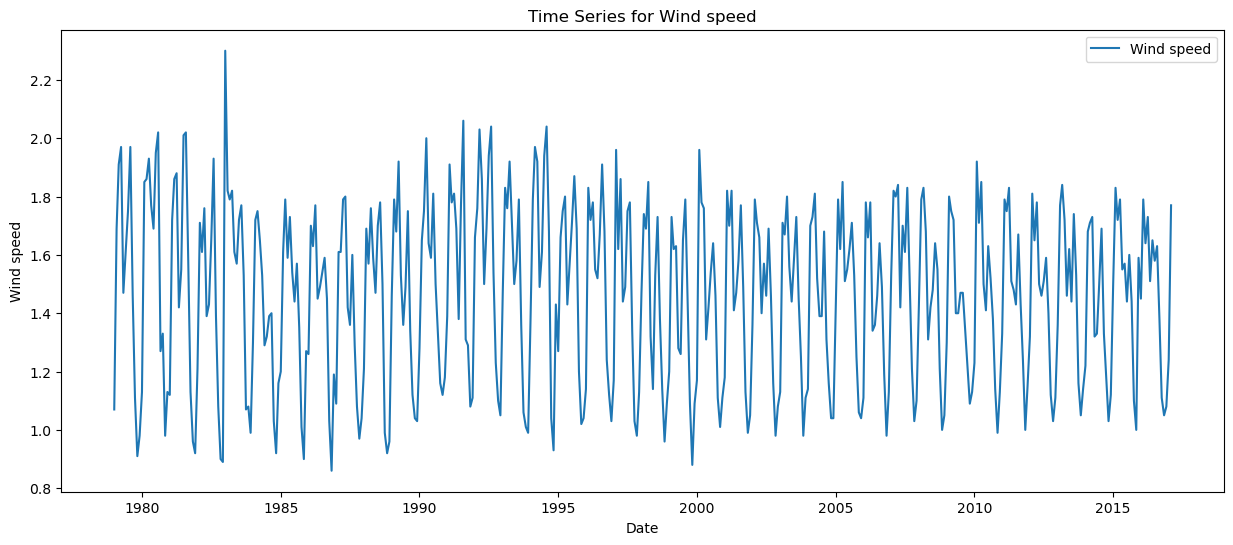

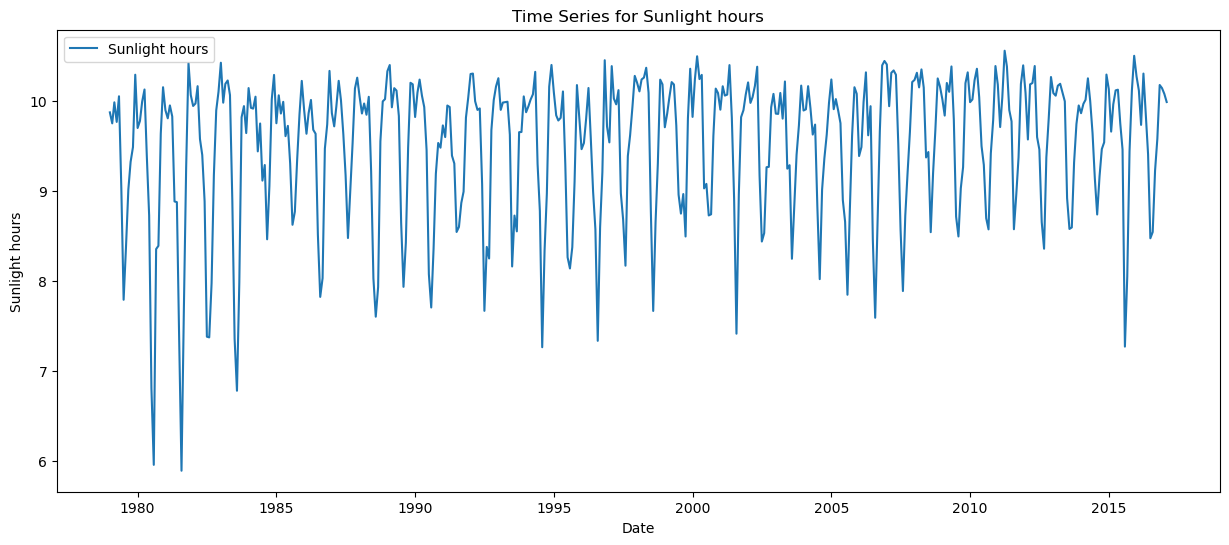

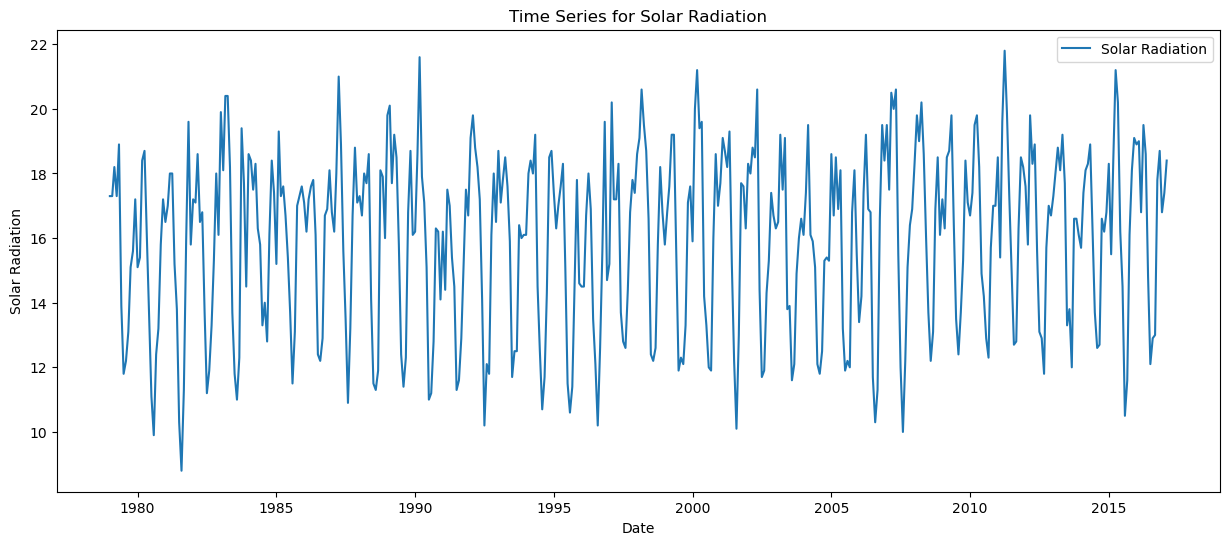

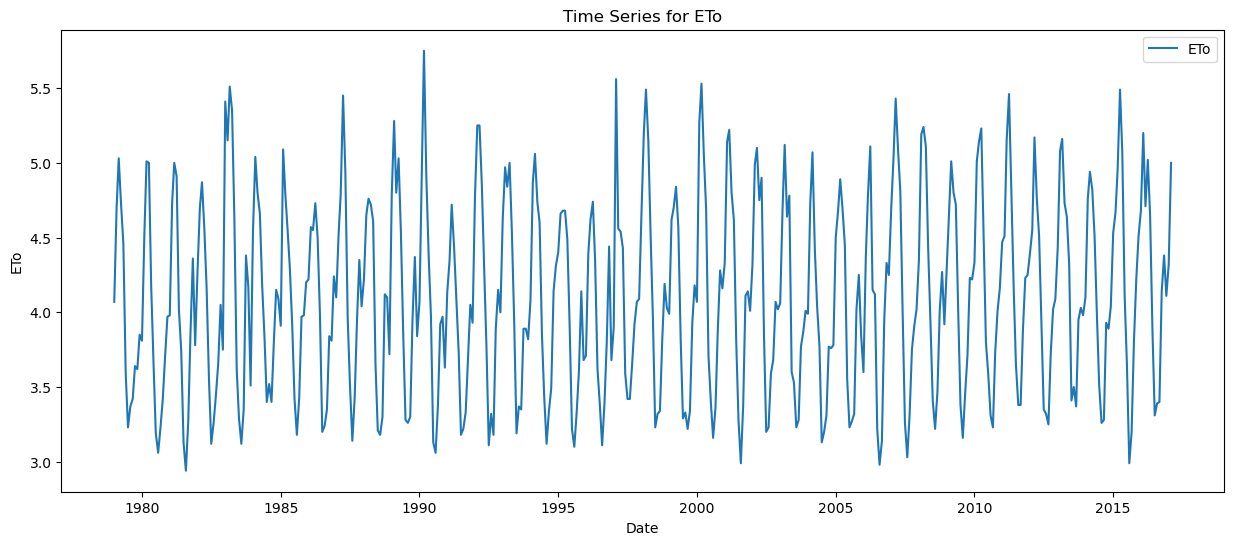

In [8]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [9]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [10]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


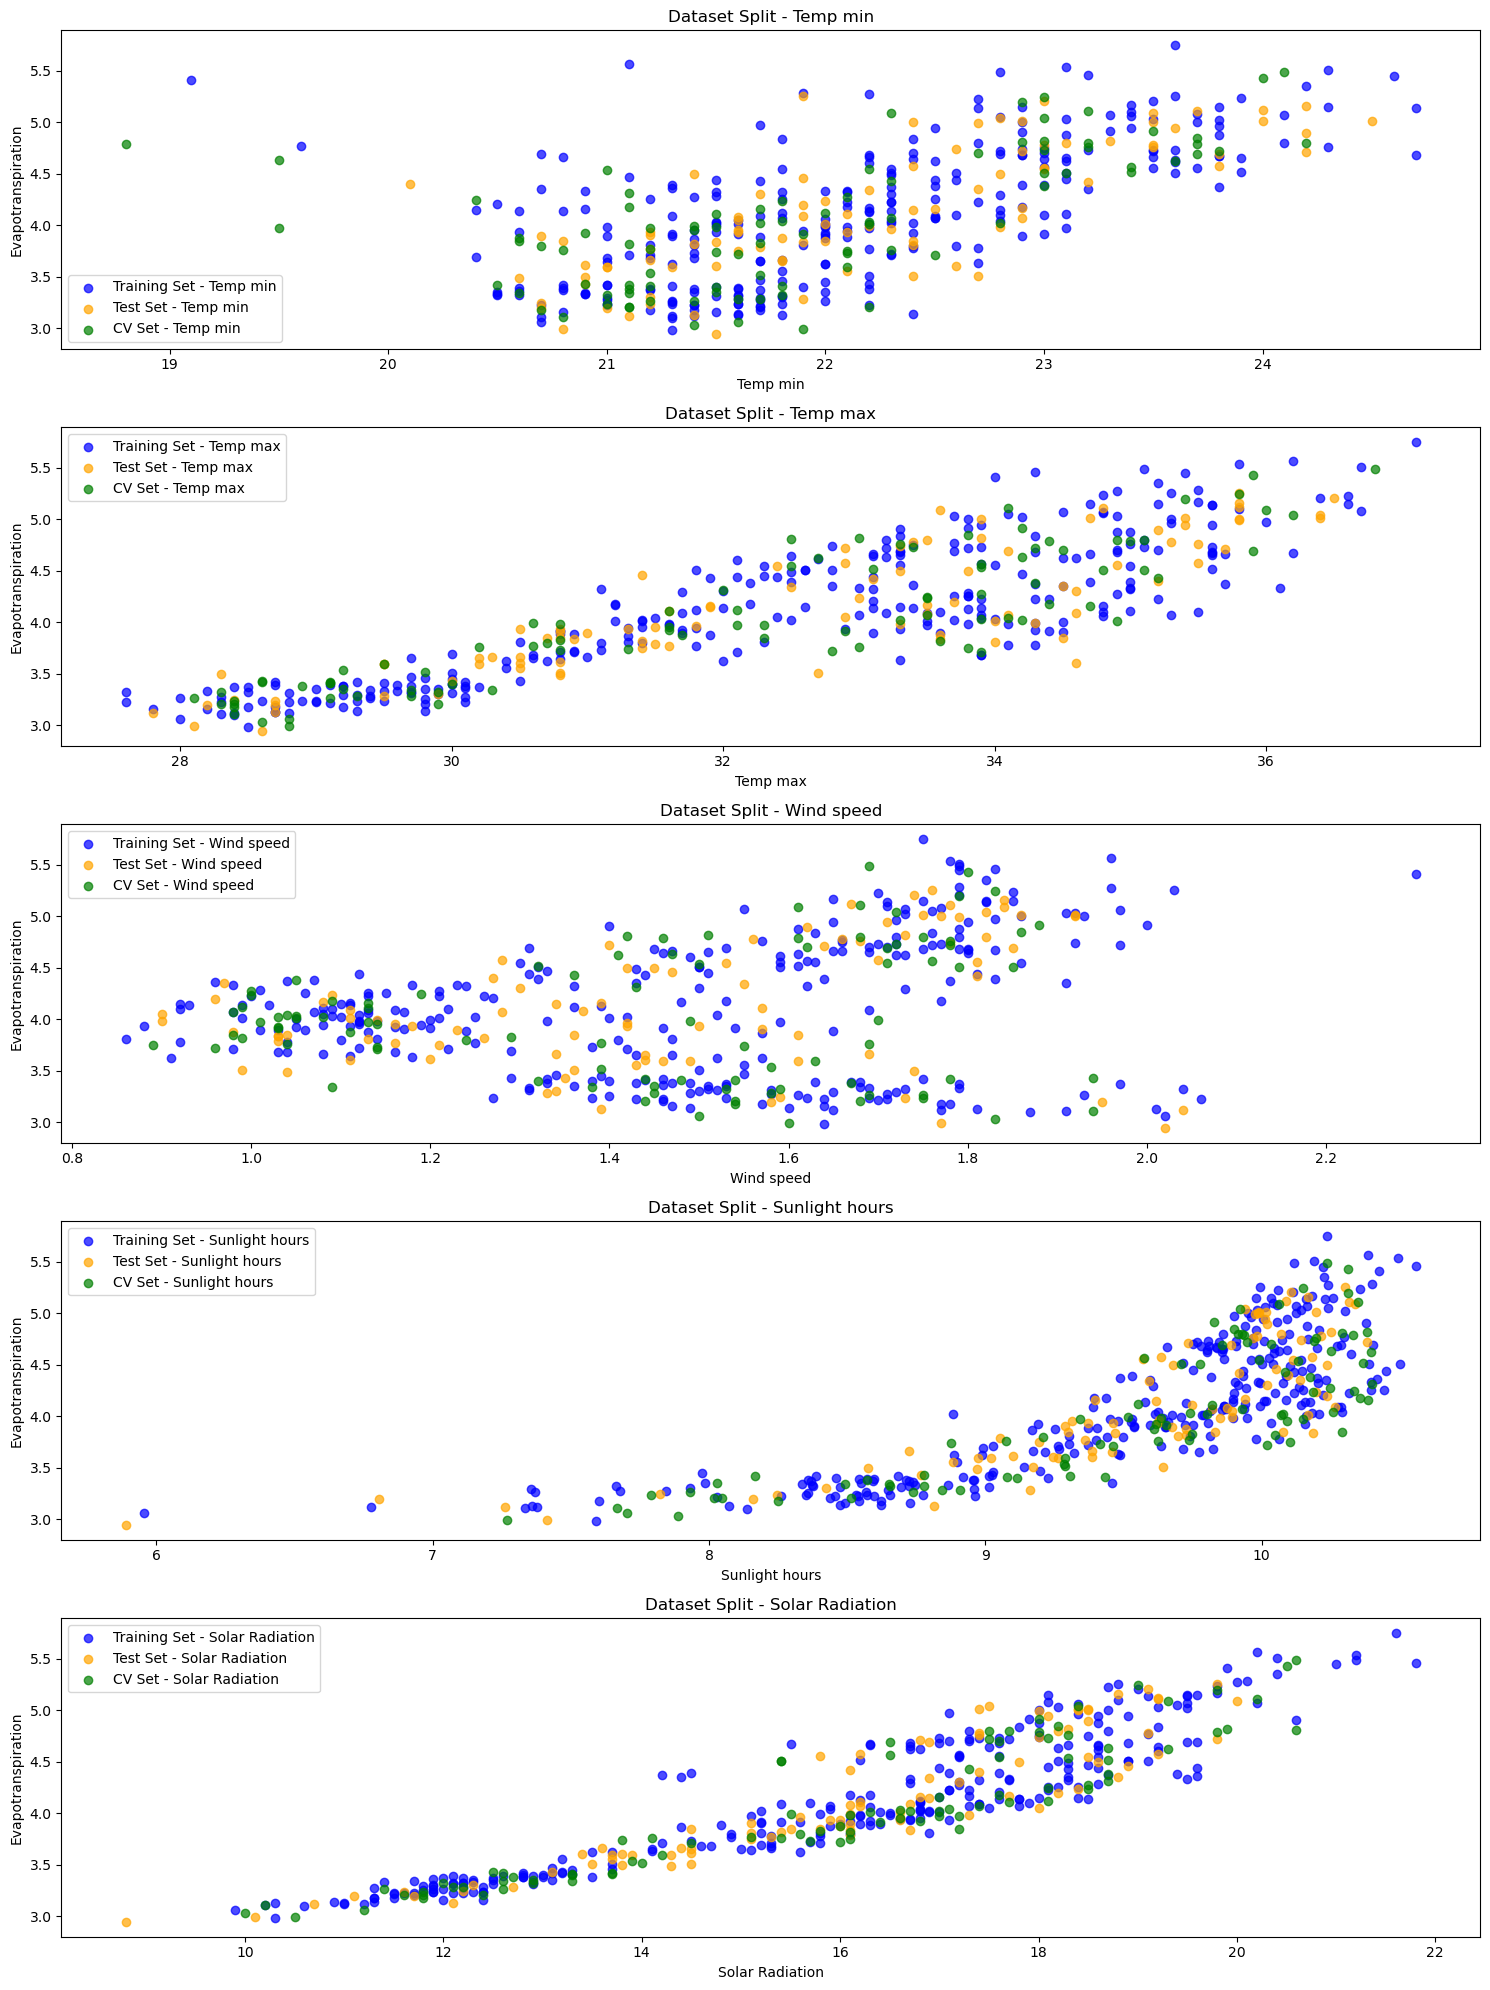

In [11]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

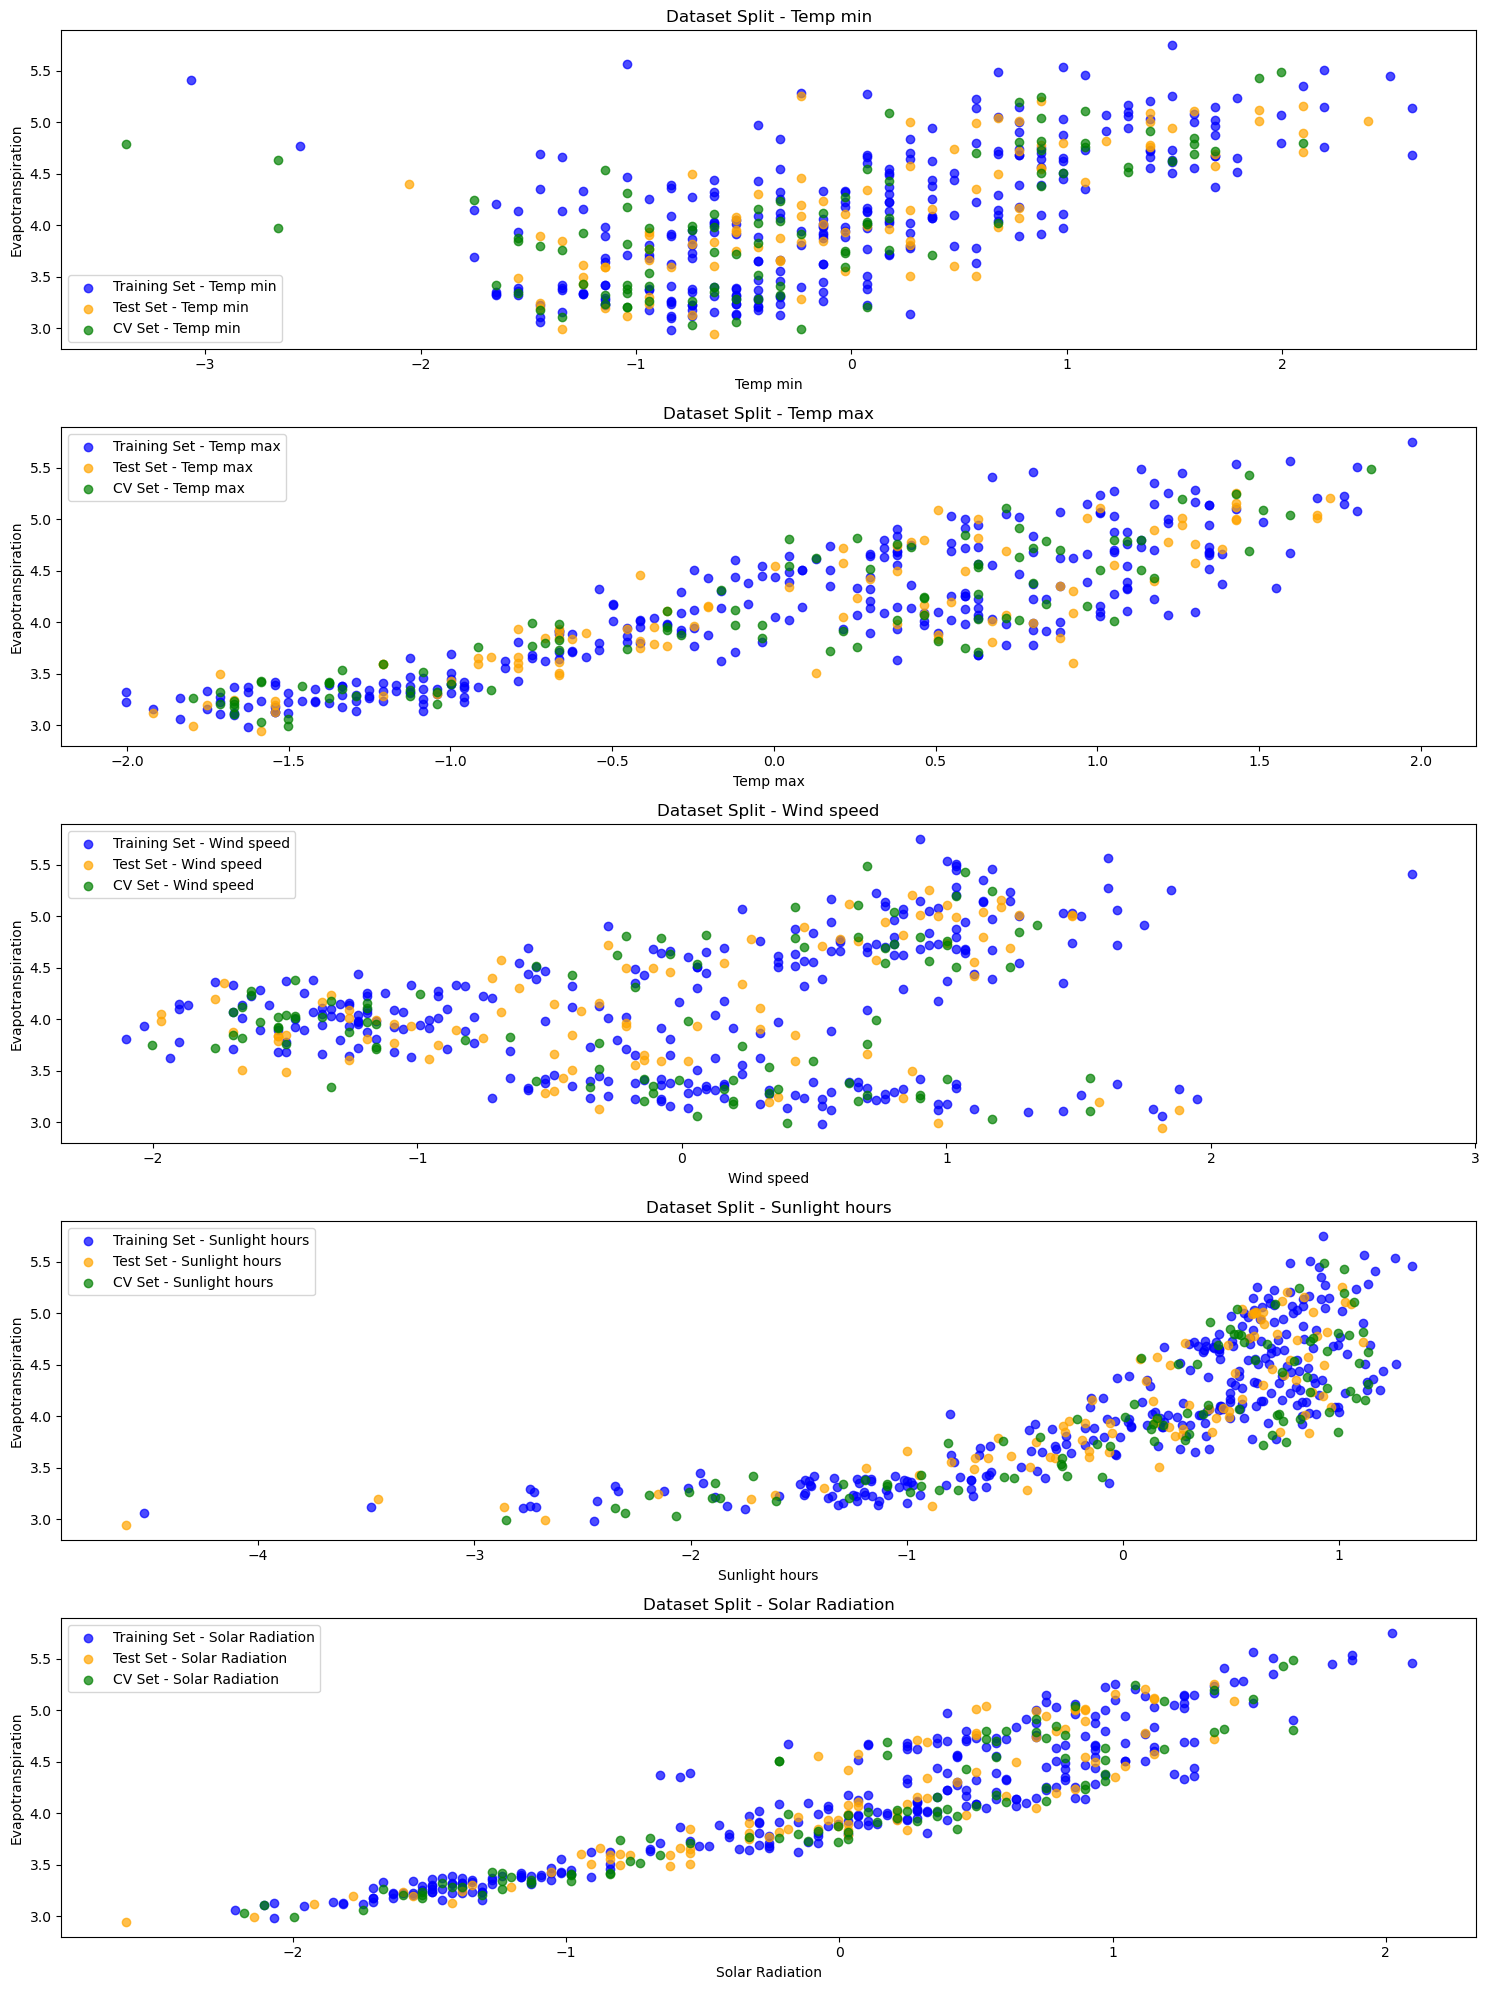

In [12]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 3s 6ms/step - loss: 14.8766 - mae: 3.7806
Epoch 2/150
9/9 [==============================] - 0s 7ms/step - loss: 13.8478 - mae: 3.6455
Epoch 3/150
9/9 [==============================] - 0s 4ms/step - loss: 12.8716 - mae: 3.5108
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 11.9118 - mae: 3.3735
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 10.9915 - mae: 3.2350
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 10.1027 - mae: 3.0962
Epoch 7/150
9/9 [==============================] - 0s 10ms/step - loss: 9.2496 - mae: 2.9568
Epoch 8/150
9/9 [==============================] - 0s 9ms/step - loss: 8.4321 - mae: 2.8166
Epoch 9/150
9/9 [==============================] - 0s 6ms/step - loss: 7.6576 - mae: 2.6756
Epoch 10/150
9/9 [==============================] - 0s 6ms/step - loss: 6.9118 - mae: 2.5322
Epoch 11/150
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 1.6257 - mae: 0.9718
Epoch 26/150
9/9 [==============================] - 0s 12ms/step - loss: 1.4975 - mae: 0.9224
Epoch 27/150
9/9 [==============================] - 0s 7ms/step - loss: 1.3887 - mae: 0.8762
Epoch 28/150
9/9 [==============================] - 0s 5ms/step - loss: 1.3028 - mae: 0.8384
Epoch 29/150
9/9 [==============================] - 0s 9ms/step - loss: 1.2280 - mae: 0.8057
Epoch 30/150
9/9 [==============================] - 0s 8ms/step - loss: 1.1731 - mae: 0.7836
Epoch 31/150
9/9 [==============================] - 0s 8ms/step - loss: 1.1218 - mae: 0.7603
Epoch 32/150
9/9 [==============================] - 0s 6ms/step - loss: 1.0845 - mae: 0.7452
Epoch 33/150
9/9 [==============================] - 0s 9ms/step - loss: 1.0518 - mae: 0.7331
Epoch 34/150
9/9 [==============================] - 0s 11ms/step - loss: 1.0240 - mae: 0.7239
Epoch 35/150
9/9 [==============================] - 0s 7ms/step - loss: 1.0009 - 

9/9 [==============================] - 0s 9ms/step - loss: 0.9157 - mae: 0.5809
Epoch 50/150
9/9 [==============================] - 0s 5ms/step - loss: 0.9028 - mae: 0.5755
Epoch 51/150
9/9 [==============================] - 0s 5ms/step - loss: 0.8904 - mae: 0.5708
Epoch 52/150
9/9 [==============================] - 0s 7ms/step - loss: 0.8783 - mae: 0.5662
Epoch 53/150
9/9 [==============================] - 0s 17ms/step - loss: 0.8664 - mae: 0.5610
Epoch 54/150
9/9 [==============================] - 0s 9ms/step - loss: 0.8548 - mae: 0.5562
Epoch 55/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8426 - mae: 0.5516
Epoch 56/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8295 - mae: 0.5463
Epoch 57/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8169 - mae: 0.5410
Epoch 58/150
9/9 [==============================] - 0s 5ms/step - loss: 0.8050 - mae: 0.5358
Epoch 59/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7922 - m

9/9 [==============================] - 0s 5ms/step - loss: 1.2007 - mae: 0.5732
Epoch 74/150
9/9 [==============================] - 0s 5ms/step - loss: 1.1801 - mae: 0.5673
Epoch 75/150
9/9 [==============================] - 0s 5ms/step - loss: 1.1585 - mae: 0.5611
Epoch 76/150
9/9 [==============================] - 0s 4ms/step - loss: 1.1376 - mae: 0.5553
Epoch 77/150
9/9 [==============================] - 0s 4ms/step - loss: 1.1157 - mae: 0.5486
Epoch 78/150
9/9 [==============================] - 0s 4ms/step - loss: 1.0955 - mae: 0.5425
Epoch 79/150
9/9 [==============================] - 0s 5ms/step - loss: 1.0745 - mae: 0.5361
Epoch 80/150
9/9 [==============================] - 0s 6ms/step - loss: 1.0539 - mae: 0.5299
Epoch 81/150
9/9 [==============================] - 0s 5ms/step - loss: 1.0338 - mae: 0.5240
Epoch 82/150
9/9 [==============================] - 0s 4ms/step - loss: 1.0145 - mae: 0.5179
Epoch 83/150
9/9 [==============================] - 0s 4ms/step - loss: 0.9947 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.2242 - mae: 0.1208
Epoch 99/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2166 - mae: 0.1184
Epoch 100/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2092 - mae: 0.1158
Epoch 101/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2023 - mae: 0.1133
Epoch 102/150
9/9 [==============================] - 0s 11ms/step - loss: 0.1955 - mae: 0.1106
Epoch 103/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1890 - mae: 0.1086
Epoch 104/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1826 - mae: 0.1066
Epoch 105/150
9/9 [==============================] - 0s 12ms/step - loss: 0.1766 - mae: 0.1051
Epoch 106/150
9/9 [==============================] - 0s 13ms/step - loss: 0.1708 - mae: 0.1029
Epoch 107/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1651 - mae: 0.1013
Epoch 108/150
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 7ms/step - loss: 0.0746 - mae: 0.0689
Epoch 123/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0720 - mae: 0.0685
Epoch 124/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0696 - mae: 0.0680
Epoch 125/150
9/9 [==============================] - 0s 12ms/step - loss: 0.0673 - mae: 0.0676
Epoch 126/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0651 - mae: 0.0674
Epoch 127/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.0669
Epoch 128/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0610 - mae: 0.0665
Epoch 129/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0591 - mae: 0.0655
Epoch 130/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0573 - mae: 0.0649
Epoch 131/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0555 - mae: 0.0651
Epoch 132/150
9/9 [==============================] - 0s 12ms/step - loss:

### Computing the errors on the train, cross validation and test sets

In [14]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.03
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [34]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 7ms/step
Selected Model: 5
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [35]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.96          3.981861
1           3.98          4.008608
2           3.65          3.683421
3           3.85          3.899992
4           3.93          3.927399
5           4.74          4.731653
6           4.82          4.827386

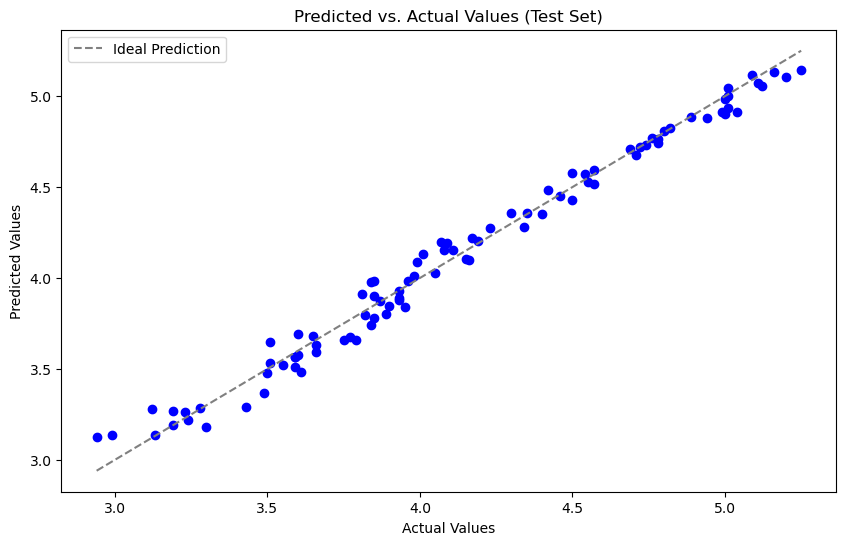

In [36]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [37]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07323641287074466
RAE: 0.11340887523207936
MAE: 0.05827372488768207
R2: 0.9853254901941385


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [38]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [39]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [132]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 18.0647 - mae: 4.2309
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 16.8192 - mae: 4.0829
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 15.6706 - mae: 3.9403
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 14.5967 - mae: 3.8013
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 13.5825 - mae: 3.6642
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 12.6259 - mae: 3.5292
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 11.7412 - mae: 3.3997
Epoch 8/300
9/9 [==============================] - 0s 11ms/step - loss: 10.8911 - mae: 3.2695
Epoch 9/300
9/9 [==============================] - 0s 10ms/step - loss: 10.0949 - mae: 3.1417
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3436 - mae: 3.0167
Epoch 11/300
9/9 [==============================] - 0s 7ms/step - lo

Epoch 89/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3481 - mae: 0.4730
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3351 - mae: 0.4640
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3230 - mae: 0.4558
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3106 - mae: 0.4479
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2996 - mae: 0.4401
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2886 - mae: 0.4325
Epoch 95/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2776 - mae: 0.4245
Epoch 96/300
9/9 [==============================] - 0s 14ms/step - loss: 0.2677 - mae: 0.4170
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2583 - mae: 0.4101
Epoch 98/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2492 - mae: 0.4032
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 6ms/step - loss: 0.0316 - mae: 0.1445
Epoch 264/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0314 - mae: 0.1443
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0313 - mae: 0.1439
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0313 - mae: 0.1436
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0312 - mae: 0.1432
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0311 - mae: 0.1432
Epoch 269/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0311 - mae: 0.1433
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0310 - mae: 0.1431
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0308 - mae: 0.1427
Epoch 272/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0309 - mae: 0.1424
Epoch 273/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1188 - mae: 0.1921
Epoch 138/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1179 - mae: 0.1908
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1170 - mae: 0.1902
Epoch 140/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1160 - mae: 0.1886
Epoch 141/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1151 - mae: 0.1873
Epoch 142/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1142 - mae: 0.1858
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1134 - mae: 0.1848
Epoch 144/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1125 - mae: 0.1836
Epoch 145/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1118 - mae: 0.1828
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1110 - mae: 0.1817
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss

9/9 [==============================] - 0s 6ms/step - loss: 9.2338 - mae: 2.9436
Epoch 12/300
9/9 [==============================] - 0s 5ms/step - loss: 8.4210 - mae: 2.8032
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 7.6403 - mae: 2.6602
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 6.9121 - mae: 2.5193
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 6.2175 - mae: 2.3725
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 5.5797 - mae: 2.2290
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 4.9975 - mae: 2.0855
Epoch 18/300
9/9 [==============================] - 0s 6ms/step - loss: 4.4795 - mae: 1.9466
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 3.9988 - mae: 1.8058
Epoch 20/300
9/9 [==============================] - 0s 6ms/step - loss: 3.5983 - mae: 1.6792
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 3.2406 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.1062 - mae: 0.1373
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1054 - mae: 0.1366
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1047 - mae: 0.1360
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1039 - mae: 0.1357
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1032 - mae: 0.1352
Epoch 191/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1024 - mae: 0.1350
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1017 - mae: 0.1352
Epoch 193/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1009 - mae: 0.1345
Epoch 194/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1002 - mae: 0.1341
Epoch 195/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0995 - mae: 0.1336
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 3ms/step - loss: 1.4112 - mae: 0.6899
Epoch 61/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3783 - mae: 0.6797
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 1.3465 - mae: 0.6697
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3150 - mae: 0.6597
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2833 - mae: 0.6488
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 1.2520 - mae: 0.6385
Epoch 66/300
9/9 [==============================] - 0s 4ms/step - loss: 1.2213 - mae: 0.6285
Epoch 67/300
9/9 [==============================] - 0s 4ms/step - loss: 1.1922 - mae: 0.6184
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 1.1631 - mae: 0.6088
Epoch 69/300
9/9 [==============================] - 0s 4ms/step - loss: 1.1348 - mae: 0.5992
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 1.1082 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0727 - mae: 0.1479
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0720 - mae: 0.1478
Epoch 236/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0714 - mae: 0.1473
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.1470
Epoch 238/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0705 - mae: 0.1467
Epoch 239/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0701 - mae: 0.1467
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0696 - mae: 0.1470
Epoch 241/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0692 - mae: 0.1471
Epoch 242/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0690 - mae: 0.1478
Epoch 243/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0684 - mae: 0.1474
Epoch 244/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.2052 - mae: 0.1589
Epoch 110/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2005 - mae: 0.1580
Epoch 111/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1959 - mae: 0.1571
Epoch 112/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1916 - mae: 0.1561
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1873 - mae: 0.1553
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1832 - mae: 0.1549
Epoch 115/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1792 - mae: 0.1545
Epoch 116/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1753 - mae: 0.1534
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1716 - mae: 0.1530
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1679 - mae: 0.1523
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - mae: 0.1488
Epoch 284/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - mae: 0.1491
Epoch 285/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0485 - mae: 0.1490
Epoch 286/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0485 - mae: 0.1494
Epoch 287/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - mae: 0.1492
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0486 - mae: 0.1492
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0487 - mae: 0.1496
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0487 - mae: 0.1500
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0486 - mae: 0.1492
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0486 - mae: 0.1492
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0712 - mae: 0.1537
Epoch 158/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0705 - mae: 0.1537
Epoch 159/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0699 - mae: 0.1541
Epoch 160/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0693 - mae: 0.1544
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.1540
Epoch 162/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0681 - mae: 0.1536
Epoch 163/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0675 - mae: 0.1538
Epoch 164/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0670 - mae: 0.1540
Epoch 165/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0667 - mae: 0.1543
Epoch 166/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.1550
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [133]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.02
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [139]:
# Select the model with the lowest CV MSE
model_num = 1

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 1
Training MSE: 0.01
Cross Validation MSE: 0.02
Test MSE: 0.01


In [140]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.96          3.886933
1           3.98          4.292805
2           3.65          3.677238
3           3.85          3.797469
4           3.93          3.846815
5           4.74          4.364491
6           4.82          4.683953

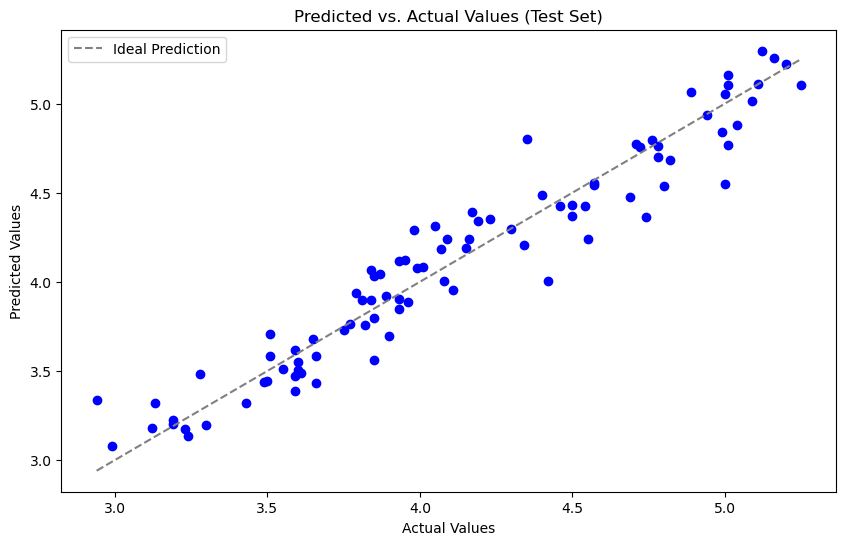

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16309753982122843
RAE: 0.247186071666939
MAE: 0.12701345557751867
R2: 0.9272212998995868


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [46]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [47]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [48]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 4ms/step - loss: 14.8569 - mae: 3.7219
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 14.0697 - mae: 3.6078
Epoch 3/300
9/9 [==============================] - 0s 17ms/step - loss: 13.2956 - mae: 3.4908
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 12.5303 - mae: 3.3730
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 11.7758 - mae: 3.2511
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 11.0328 - mae: 3.1300
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 10.3204 - mae: 3.0105
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 9.6205 - mae: 2.8965
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 8.9482 - mae: 2.7833
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 8.2905 - mae: 2.6714
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss

Epoch 89/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0797 - mae: 0.2323
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.2295
Epoch 91/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0758 - mae: 0.2267
Epoch 92/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0741 - mae: 0.2242
Epoch 93/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0724 - mae: 0.2219
Epoch 94/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0707 - mae: 0.2195
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0693 - mae: 0.2174
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0678 - mae: 0.2152
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.2128
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0657 - mae: 0.2113
Epoch 99/300
9/9 [==============================] - 0s 6ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 0.0309 - mae: 0.1408
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0309 - mae: 0.1407
Epoch 265/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - mae: 0.1402
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0310 - mae: 0.1405
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0309 - mae: 0.1400
Epoch 268/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0308 - mae: 0.1401
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0308 - mae: 0.1403
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0309 - mae: 0.1398
Epoch 271/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0307 - mae: 0.1394
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0307 - mae: 0.1396
Epoch 273/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1146 - mae: 0.1938
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1136 - mae: 0.1926
Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.1914
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1120 - mae: 0.1903
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.1894
Epoch 142/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1104 - mae: 0.1884
Epoch 143/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1096 - mae: 0.1873
Epoch 144/300
9/9 [==============================] - 0s 13ms/step - loss: 0.1089 - mae: 0.1864
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1083 - mae: 0.1859
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1075 - mae: 0.1850
Epoch 147/300
9/9 [==============================] - 0s 8ms/step - loss

9/9 [==============================] - 0s 5ms/step - loss: 8.7370 - mae: 2.8563
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 8.0902 - mae: 2.7361
Epoch 13/300
9/9 [==============================] - 0s 8ms/step - loss: 7.4765 - mae: 2.6144
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 6.8989 - mae: 2.4947
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 6.3404 - mae: 2.3744
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 5.8212 - mae: 2.2540
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 5.3342 - mae: 2.1359
Epoch 18/300
9/9 [==============================] - 0s 7ms/step - loss: 4.8768 - mae: 2.0212
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 4.4562 - mae: 1.9095
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 4.0681 - mae: 1.8017
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 3.7181 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1025 - mae: 0.1699
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1017 - mae: 0.1687
Epoch 188/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1010 - mae: 0.1681
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1002 - mae: 0.1677
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0995 - mae: 0.1667
Epoch 191/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0988 - mae: 0.1661
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0982 - mae: 0.1658
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0976 - mae: 0.1648
Epoch 194/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0970 - mae: 0.1648
Epoch 195/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0961 - mae: 0.1638
Epoch 196/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 1.4683 - mae: 0.7411
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 1.4333 - mae: 0.7306
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 1.4004 - mae: 0.7206
Epoch 63/300
9/9 [==============================] - 0s 5ms/step - loss: 1.3665 - mae: 0.7102
Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 1.3325 - mae: 0.6992
Epoch 65/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2994 - mae: 0.6887
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2677 - mae: 0.6783
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2350 - mae: 0.6675
Epoch 68/300
9/9 [==============================] - 0s 13ms/step - loss: 1.2030 - mae: 0.6570
Epoch 69/300
9/9 [==============================] - 0s 5ms/step - loss: 1.1721 - mae: 0.6463
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 1.1409 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.1738
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.1734
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0804 - mae: 0.1730
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0797 - mae: 0.1729
Epoch 238/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0791 - mae: 0.1731
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0787 - mae: 0.1729
Epoch 240/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0780 - mae: 0.1727
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0775 - mae: 0.1729
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0770 - mae: 0.1729
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0766 - mae: 0.1727
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 12ms/step - loss: 0.3811 - mae: 0.2436
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3730 - mae: 0.2411
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3652 - mae: 0.2397
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3576 - mae: 0.2380
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3501 - mae: 0.2363
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3428 - mae: 0.2345
Epoch 115/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3357 - mae: 0.2327
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3288 - mae: 0.2308
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3220 - mae: 0.2290
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3153 - mae: 0.2273
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 7ms/step - loss: 0.0586 - mae: 0.1730
Epoch 284/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0585 - mae: 0.1731
Epoch 285/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0585 - mae: 0.1730
Epoch 286/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0585 - mae: 0.1732
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0584 - mae: 0.1729
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.1733
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0583 - mae: 0.1733
Epoch 290/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0584 - mae: 0.1736
Epoch 291/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0582 - mae: 0.1732
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0582 - mae: 0.1736
Epoch 293/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0679 - mae: 0.1737
Epoch 158/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0677 - mae: 0.1738
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0676 - mae: 0.1740
Epoch 160/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0674 - mae: 0.1745
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0670 - mae: 0.1745
Epoch 162/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0670 - mae: 0.1747
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.1743
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0665 - mae: 0.1744
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0664 - mae: 0.1745
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.1747
Epoch 167/300
9/9 [==============================] - 0s 5ms/step - loss: 0

In [49]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 7ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [50]:
# Select the model with the lowest CV MSE
model_num = 1

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 1
Training MSE: 0.01
Cross Validation MSE: 0.02
Test MSE: 0.02


In [51]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.96          3.811562
1           3.98          4.310762
2           3.65          3.643191
3           3.85          3.759900
4           3.93          3.854630
5           4.74          4.366732
6           4.82          4.498813

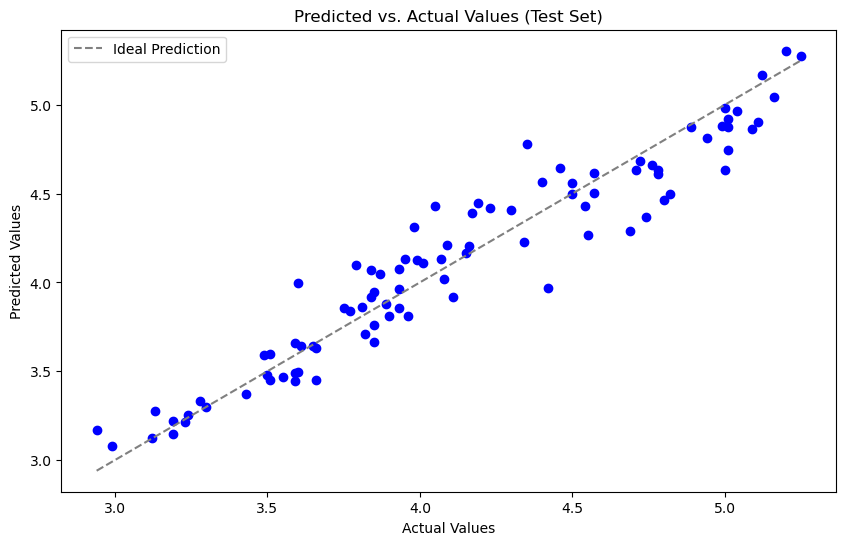

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17341424676714728
RAE: 0.26100430070375924
MAE: 0.13411377886067266
R2: 0.91772289128532


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [54]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [55]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [56]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 15.9892 - mae: 3.9318
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 14.9901 - mae: 3.8110
Epoch 3/300
9/9 [==============================] - 0s 21ms/step - loss: 14.0425 - mae: 3.6920
Epoch 4/300
9/9 [==============================] - 0s 13ms/step - loss: 13.1317 - mae: 3.5737
Epoch 5/300
9/9 [==============================] - 0s 9ms/step - loss: 12.2586 - mae: 3.4548
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 11.4193 - mae: 3.3363
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 10.6100 - mae: 3.2163
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 9.8416 - mae: 3.0976
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 9.0993 - mae: 2.9772
Epoch 10/300
9/9 [==============================] - 0s 7ms/step - loss: 8.3991 - mae: 2.8576
Epoch 11/300
9/9 [==============================] - 0s 11ms/step - los

9/9 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.2116
Epoch 176/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.2109
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.2094
Epoch 178/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0682 - mae: 0.2081
Epoch 179/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0678 - mae: 0.2073
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.2060
Epoch 181/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0661 - mae: 0.2046
Epoch 182/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.2034
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.2023
Epoch 184/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0639 - mae: 0.2011
Epoch 185/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 7ms/step - loss: 0.5738 - mae: 0.5697
Epoch 50/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5524 - mae: 0.5583
Epoch 51/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5306 - mae: 0.5454
Epoch 52/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5110 - mae: 0.5338
Epoch 53/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4929 - mae: 0.5229
Epoch 54/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4740 - mae: 0.5112
Epoch 55/300
9/9 [==============================] - 0s 11ms/step - loss: 0.4570 - mae: 0.5002
Epoch 56/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4408 - mae: 0.4899
Epoch 57/300
9/9 [==============================] - 0s 14ms/step - loss: 0.4242 - mae: 0.4790
Epoch 58/300
9/9 [==============================] - 0s 14ms/step - loss: 0.4090 - mae: 0.4691
Epoch 59/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3955 

9/9 [==============================] - 0s 9ms/step - loss: 0.0704 - mae: 0.1473
Epoch 224/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.1472
Epoch 225/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.1470
Epoch 226/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.1472
Epoch 227/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0696 - mae: 0.1471
Epoch 228/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0695 - mae: 0.1469
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0693 - mae: 0.1465
Epoch 230/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.1466
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.1464
Epoch 232/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.1464
Epoch 233/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 17ms/step - loss: 9.3774 - mae: 2.9337
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - loss: 8.7169 - mae: 2.8174
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 8.0694 - mae: 2.6994
Epoch 13/300
9/9 [==============================] - 0s 7ms/step - loss: 7.4352 - mae: 2.5796
Epoch 14/300
9/9 [==============================] - 0s 12ms/step - loss: 6.8424 - mae: 2.4626
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 6.2638 - mae: 2.3438
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 5.7283 - mae: 2.2273
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 5.2157 - mae: 2.1087
Epoch 18/300
9/9 [==============================] - 0s 6ms/step - loss: 4.7357 - mae: 1.9939
Epoch 19/300
9/9 [==============================] - 0s 6ms/step - loss: 4.2970 - mae: 1.8810
Epoch 20/300
9/9 [==============================] - 0s 6ms/step - loss: 3.8898 - 

9/9 [==============================] - 0s 5ms/step - loss: 0.1222 - mae: 0.1714
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1215 - mae: 0.1715
Epoch 187/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1205 - mae: 0.1703
Epoch 188/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1198 - mae: 0.1703
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1190 - mae: 0.1697
Epoch 190/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1183 - mae: 0.1691
Epoch 191/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1175 - mae: 0.1687
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1169 - mae: 0.1684
Epoch 193/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - mae: 0.1678
Epoch 194/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1155 - mae: 0.1682
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.8663 - mae: 0.4730
Epoch 60/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8394 - mae: 0.4616
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8121 - mae: 0.4498
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7865 - mae: 0.4384
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7624 - mae: 0.4273
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7385 - mae: 0.4164
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7156 - mae: 0.4059
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6944 - mae: 0.3958
Epoch 67/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6738 - mae: 0.3858
Epoch 68/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6547 - mae: 0.3763
Epoch 69/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6355 - m

9/9 [==============================] - 0s 12ms/step - loss: 0.0712 - mae: 0.1652
Epoch 234/300
9/9 [==============================] - 0s 15ms/step - loss: 0.0708 - mae: 0.1649
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0706 - mae: 0.1651
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0703 - mae: 0.1653
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.1654
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.1653
Epoch 239/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0694 - mae: 0.1651
Epoch 240/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.1653
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.1659
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.1657
Epoch 243/300
9/9 [==============================] - 0s 7ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 7.3698 - mae: 2.4600
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 6.8706 - mae: 2.3516
Epoch 22/300
9/9 [==============================] - 0s 4ms/step - loss: 6.3866 - mae: 2.2403
Epoch 23/300
9/9 [==============================] - 0s 5ms/step - loss: 5.9444 - mae: 2.1326
Epoch 24/300
9/9 [==============================] - 0s 5ms/step - loss: 5.5286 - mae: 2.0255
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 5.1545 - mae: 1.9212
Epoch 26/300
9/9 [==============================] - 0s 7ms/step - loss: 4.7990 - mae: 1.8187
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 4.4870 - mae: 1.7259
Epoch 28/300
9/9 [==============================] - 0s 6ms/step - loss: 4.1983 - mae: 1.6345
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 3.9380 - mae: 1.5491
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 3.7055 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.3006 - mae: 0.2095
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2944 - mae: 0.2075
Epoch 110/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2883 - mae: 0.2055
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2824 - mae: 0.2038
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2769 - mae: 0.2021
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2714 - mae: 0.2005
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2661 - mae: 0.1990
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2609 - mae: 0.1977
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2559 - mae: 0.1963
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2510 - mae: 0.1953
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.0635 - mae: 0.1721
Epoch 283/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0634 - mae: 0.1718
Epoch 284/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0634 - mae: 0.1722
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0632 - mae: 0.1722
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0632 - mae: 0.1721
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0632 - mae: 0.1723
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0632 - mae: 0.1724
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0631 - mae: 0.1722
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.1718
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0631 - mae: 0.1724
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1095 - mae: 0.1773
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1079 - mae: 0.1773
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1065 - mae: 0.1775
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1050 - mae: 0.1775
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1035 - mae: 0.1775
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1022 - mae: 0.1776
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1009 - mae: 0.1775
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0996 - mae: 0.1777
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0986 - mae: 0.1783
Epoch 165/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0973 - mae: 0.1780
Epoch 166/300
9/9 [==============================] - 0s 7ms/step - loss: 

In [57]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.03, CV MSE: 0.02
Model 6: Training MSE: 0.03, CV MSE: 0.02


In [66]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 4
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [67]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.96          4.053356
1           3.98          4.449465
2           3.65          3.768036
3           3.85          4.047638
4           3.93          3.932341
5           4.74          4.553543
6           4.82          4.723035

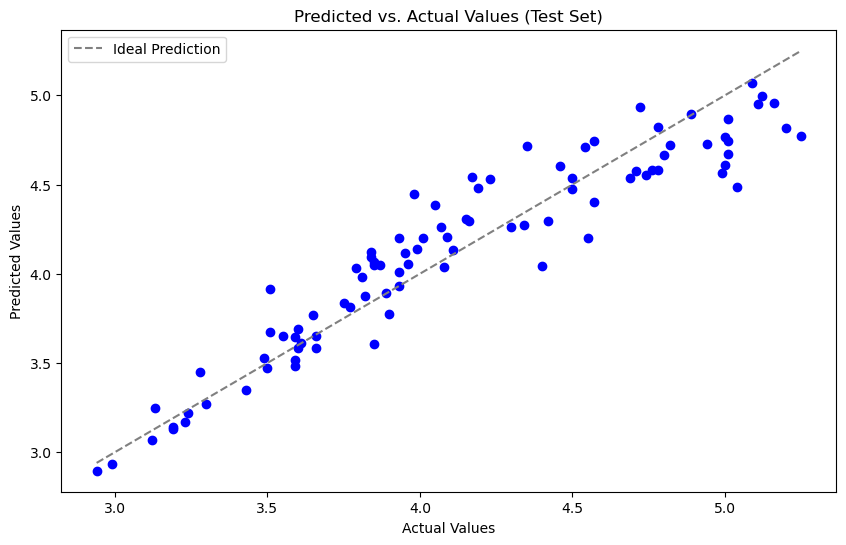

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2035124609433879
RAE: 0.3130018374977957
MAE: 0.16083205948705262
R2: 0.8866839346978226


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [70]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [71]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [72]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 18.9444 - mae: 4.2944
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 17.9311 - mae: 4.1819
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 16.9723 - mae: 4.0715
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 16.0737 - mae: 3.9642
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 15.1946 - mae: 3.8560
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 14.3580 - mae: 3.7496
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 13.5458 - mae: 3.6430
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 12.7628 - mae: 3.5354
Epoch 9/300
9/9 [==============================] - 0s 17ms/step - loss: 12.0015 - mae: 3.4275
Epoch 10/300
9/9 [==============================] - 0s 8ms/step - loss: 11.2623 - mae: 3.3177
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - lo

Epoch 89/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3412 - mae: 0.4736
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3346 - mae: 0.4686
Epoch 91/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3275 - mae: 0.4637
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3212 - mae: 0.4595
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3143 - mae: 0.4545
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3081 - mae: 0.4499
Epoch 95/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3015 - mae: 0.4451
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2957 - mae: 0.4405
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2894 - mae: 0.4360
Epoch 98/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2835 - mae: 0.4316
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss

9/9 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.1636
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0449 - mae: 0.1630
Epoch 265/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0448 - mae: 0.1629
Epoch 266/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.1628
Epoch 267/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0446 - mae: 0.1624
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.1621
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.1621
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.1624
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0444 - mae: 0.1619
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.1612
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 10ms/step - loss: 0.1696 - mae: 0.2670
Epoch 138/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1673 - mae: 0.2643
Epoch 139/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1647 - mae: 0.2617
Epoch 140/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1628 - mae: 0.2599
Epoch 141/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1605 - mae: 0.2572
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1585 - mae: 0.2551
Epoch 143/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1566 - mae: 0.2529
Epoch 144/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1547 - mae: 0.2503
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1528 - mae: 0.2478
Epoch 146/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1510 - mae: 0.2458
Epoch 147/300
9/9 [==============================] - 0s 6ms/step - loss

9/9 [==============================] - 0s 5ms/step - loss: 10.9850 - mae: 3.2084
Epoch 12/300
9/9 [==============================] - 0s 15ms/step - loss: 10.3271 - mae: 3.1011
Epoch 13/300
9/9 [==============================] - 0s 9ms/step - loss: 9.7024 - mae: 2.9928
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 9.0925 - mae: 2.8858
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 8.5045 - mae: 2.7779
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 7.9428 - mae: 2.6699
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 7.3951 - mae: 2.5623
Epoch 18/300
9/9 [==============================] - 0s 6ms/step - loss: 6.8754 - mae: 2.4555
Epoch 19/300
9/9 [==============================] - 0s 7ms/step - loss: 6.3710 - mae: 2.3482
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 5.8880 - mae: 2.2421
Epoch 21/300
9/9 [==============================] - 0s 6ms/step - loss: 5.4375 -

9/9 [==============================] - 0s 5ms/step - loss: 0.1308 - mae: 0.1796
Epoch 187/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1300 - mae: 0.1791
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1293 - mae: 0.1788
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1285 - mae: 0.1784
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1277 - mae: 0.1779
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1270 - mae: 0.1776
Epoch 192/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1262 - mae: 0.1771
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1255 - mae: 0.1768
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1248 - mae: 0.1765
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1240 - mae: 0.1761
Epoch 196/300
9/9 [==============================] - 0s 13ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 1.0472 - mae: 0.5466
Epoch 61/300
9/9 [==============================] - 0s 8ms/step - loss: 1.0248 - mae: 0.5393
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 1.0028 - mae: 0.5320
Epoch 63/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9814 - mae: 0.5250
Epoch 64/300
9/9 [==============================] - 0s 14ms/step - loss: 0.9603 - mae: 0.5179
Epoch 65/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9394 - mae: 0.5113
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9190 - mae: 0.5041
Epoch 67/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8988 - mae: 0.4970
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8789 - mae: 0.4899
Epoch 69/300
9/9 [==============================] - 0s 7ms/step - loss: 0.8595 - mae: 0.4834
Epoch 70/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8403 - m

9/9 [==============================] - 0s 6ms/step - loss: 0.0899 - mae: 0.1947
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0896 - mae: 0.1941
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0893 - mae: 0.1953
Epoch 237/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0886 - mae: 0.1952
Epoch 238/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0882 - mae: 0.1941
Epoch 239/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0879 - mae: 0.1940
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0875 - mae: 0.1941
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0875 - mae: 0.1941
Epoch 242/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0868 - mae: 0.1939
Epoch 243/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0866 - mae: 0.1953
Epoch 244/300
9/9 [==============================] - 0s 7ms/step - loss: 

Epoch 109/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2417 - mae: 0.2152
Epoch 110/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2364 - mae: 0.2143
Epoch 111/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2314 - mae: 0.2136
Epoch 112/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2267 - mae: 0.2133
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2222 - mae: 0.2134
Epoch 114/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2178 - mae: 0.2134
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2137 - mae: 0.2131
Epoch 116/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2095 - mae: 0.2127
Epoch 117/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2054 - mae: 0.2128
Epoch 118/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2016 - mae: 0.2127
Epoch 119/300
9/9 [==============================] - 0s 12

9/9 [==============================] - 0s 7ms/step - loss: 0.0891 - mae: 0.2088
Epoch 197/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0889 - mae: 0.2084
Epoch 198/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0886 - mae: 0.2088
Epoch 199/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0884 - mae: 0.2101
Epoch 200/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0881 - mae: 0.2097
Epoch 201/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0876 - mae: 0.2089
Epoch 202/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0873 - mae: 0.2098
Epoch 203/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0873 - mae: 0.2101
Epoch 204/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0868 - mae: 0.2098
Epoch 205/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0867 - mae: 0.2106
Epoch 206/300
9/9 [==============================] - 0s 7ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.7550 - mae: 0.3432
Epoch 71/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7155 - mae: 0.3292
Epoch 72/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6789 - mae: 0.3160
Epoch 73/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6435 - mae: 0.3032
Epoch 74/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6104 - mae: 0.2913
Epoch 75/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5799 - mae: 0.2811
Epoch 76/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5516 - mae: 0.2723
Epoch 77/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5252 - mae: 0.2641
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5011 - mae: 0.2580
Epoch 79/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4791 - mae: 0.2532
Epoch 80/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4579 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0953 - mae: 0.2146
Epoch 245/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0952 - mae: 0.2138
Epoch 246/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0952 - mae: 0.2145
Epoch 247/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0952 - mae: 0.2139
Epoch 248/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0952 - mae: 0.2134
Epoch 249/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0952 - mae: 0.2136
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0951 - mae: 0.2135
Epoch 251/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0953 - mae: 0.2136
Epoch 252/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0952 - mae: 0.2139
Epoch 253/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0952 - mae: 0.2139
Epoch 254/300
9/9 [==============================] - 0s 6ms/step - loss: 0

In [73]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.02
Model 5: Training MSE: 0.03, CV MSE: 0.03
Model 6: Training MSE: 0.04, CV MSE: 0.03


In [77]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 4
Training MSE: 0.03
Cross Validation MSE: 0.02
Test MSE: 0.03


In [78]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.96          4.015147
1           3.98          3.948450
2           3.65          3.601832
3           3.85          3.694979
4           3.93          3.678688
5           4.74          4.578243
6           4.82          4.677521

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22615625538779258
RAE: 0.3471426122999553
MAE: 0.17837486743927006
R2: 0.860064893263005


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.02


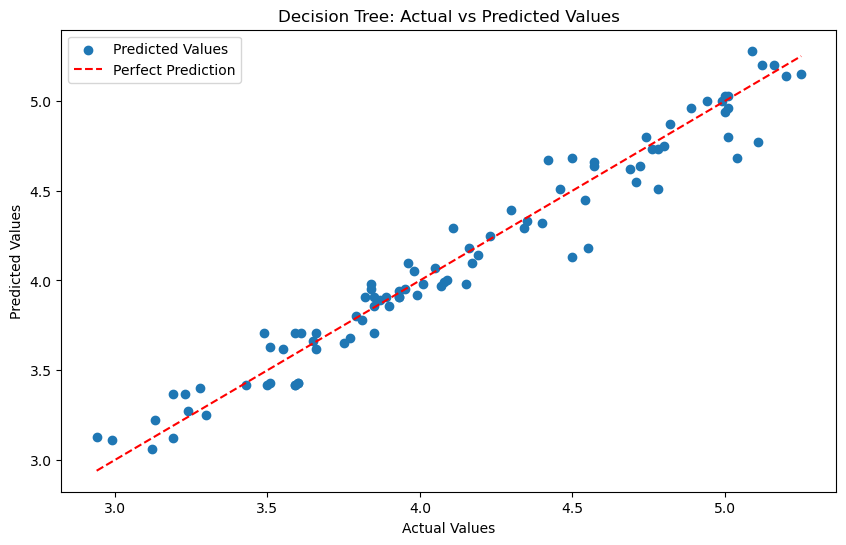

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1263234289261188
RAE: 0.18763336031197117
MAE: 0.09641304347826088
R2: 0.9563406480135339


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.05


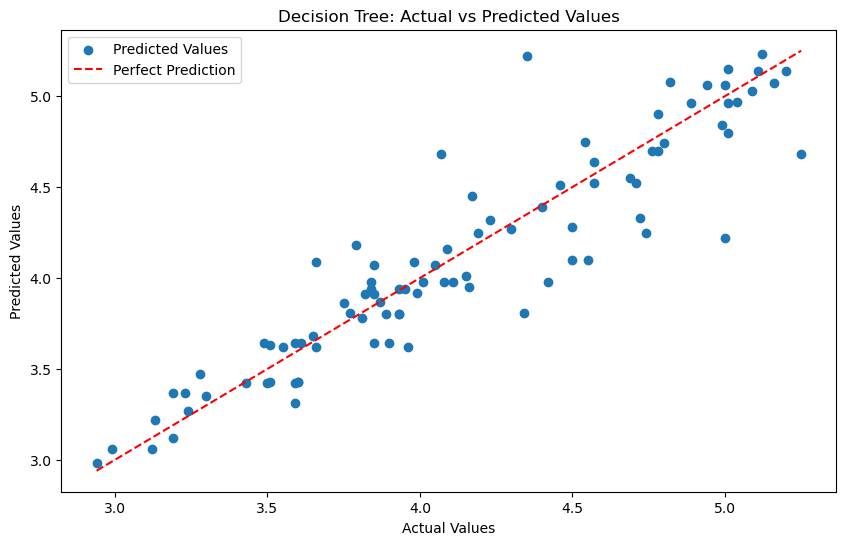

In [82]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2318615591440195
RAE: 0.31244021779118547
MAE: 0.16054347826086965
R2: 0.852915476473086


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.07


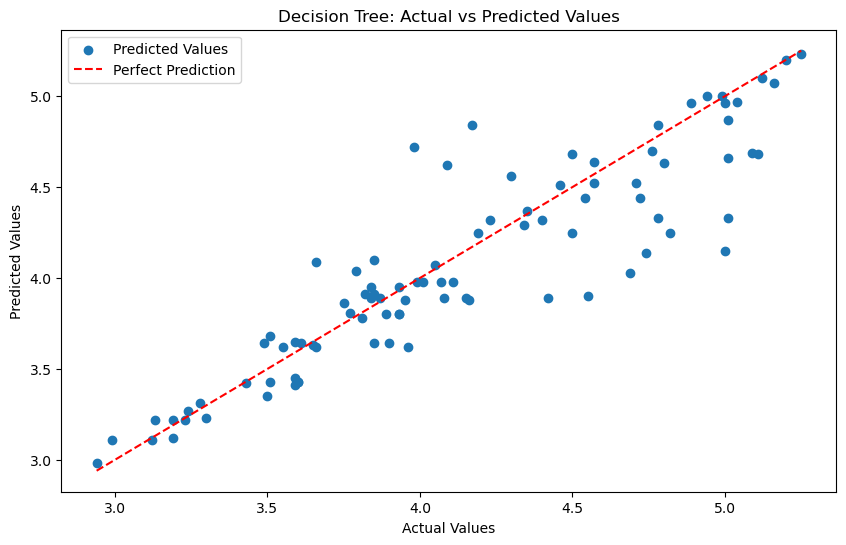

In [92]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2642935620792185
RAE: 0.3445938488705761
MAE: 0.17706521739130435
R2: 0.8088903387571509


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.06
Mean Squared Error for Decision Tree: 0.05


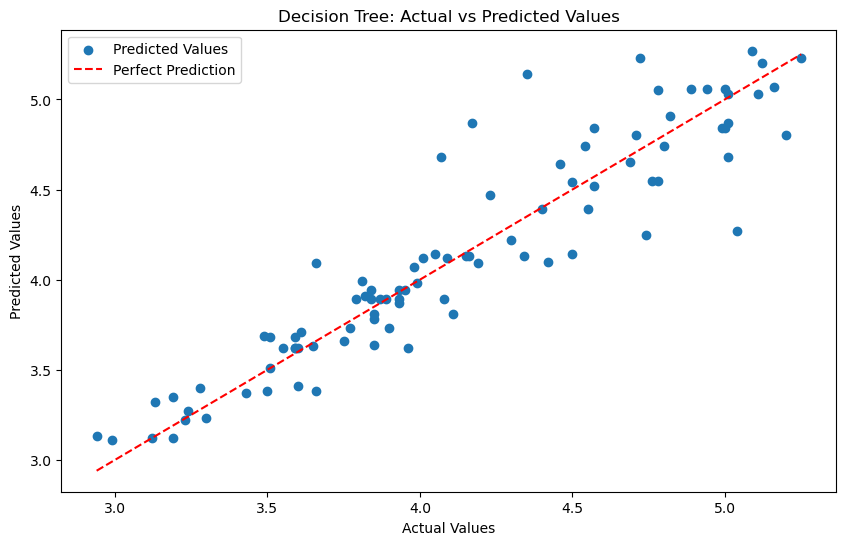

In [94]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22633660965377483
RAE: 0.303344124788463
MAE: 0.15586956521739137
R2: 0.8598416143912441


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.06
Mean Squared Error for Decision Tree: 0.08


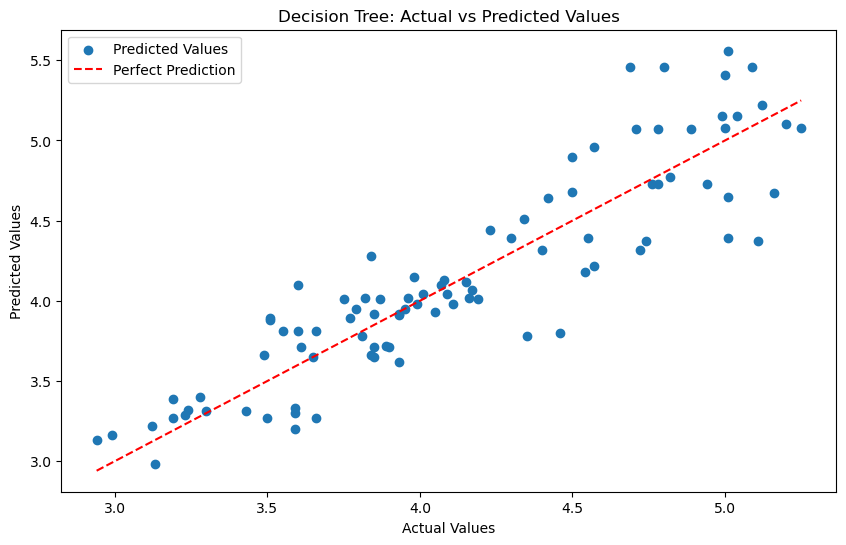

In [96]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2815350005270022
RAE: 0.42709329703480237
MAE: 0.2194565217391304
R2: 0.7831425920437919


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.06
Mean Squared Error on Test Set for Random Forest: 0.01


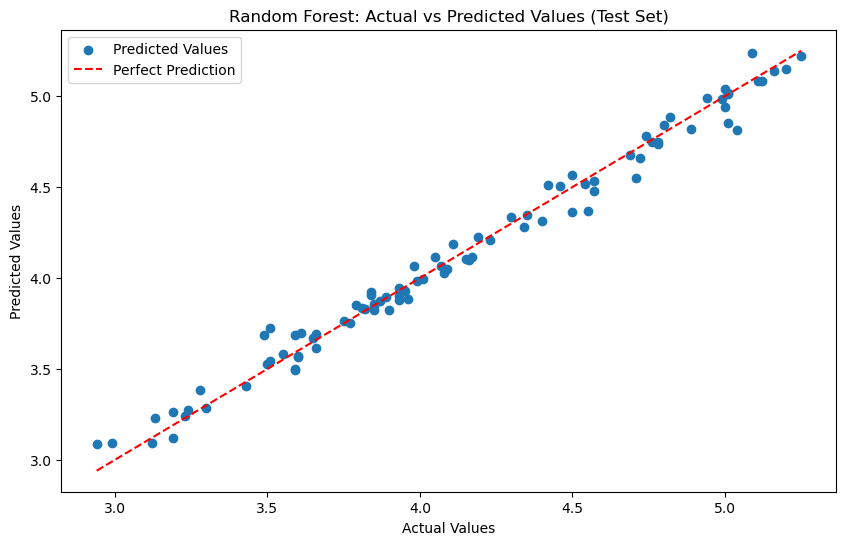

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [99]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Solar Radiation    0.596152
Wind speed         0.176580
Temp max           0.113800
Sunlight hours     0.109042
Temp min           0.004426
dtype: float64


In [100]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07386274212289319
RAE: 0.10869408064160063
MAE: 0.05585108695652153
R2: 0.9850734195056761


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.06
Mean Squared Error on Test Set for Random Forest: 0.03


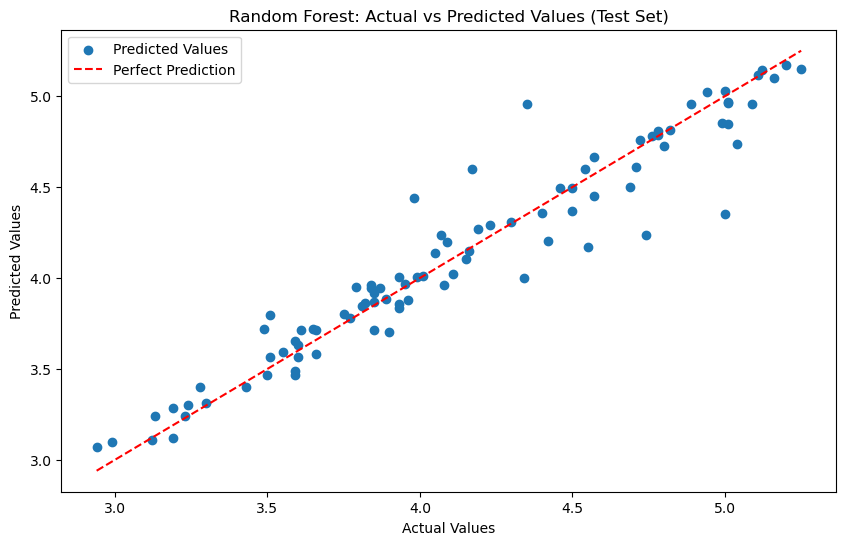

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [102]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16601021904113925
RAE: 0.21099128099477601
MAE: 0.10841521739130439
R2: 0.9245986504071094


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.06
Mean Squared Error on Test Set for Random Forest: 0.03


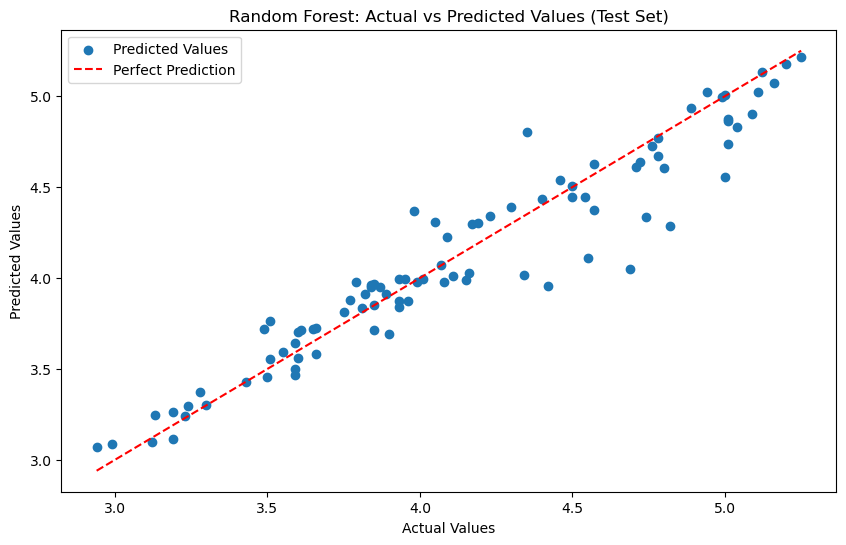

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [104]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1779931138751062
RAE: 0.2426647229784412
MAE: 0.12469021739130415
R2: 0.9133206041321763


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.06
Mean Squared Error on Test Set for Random Forest: 0.04


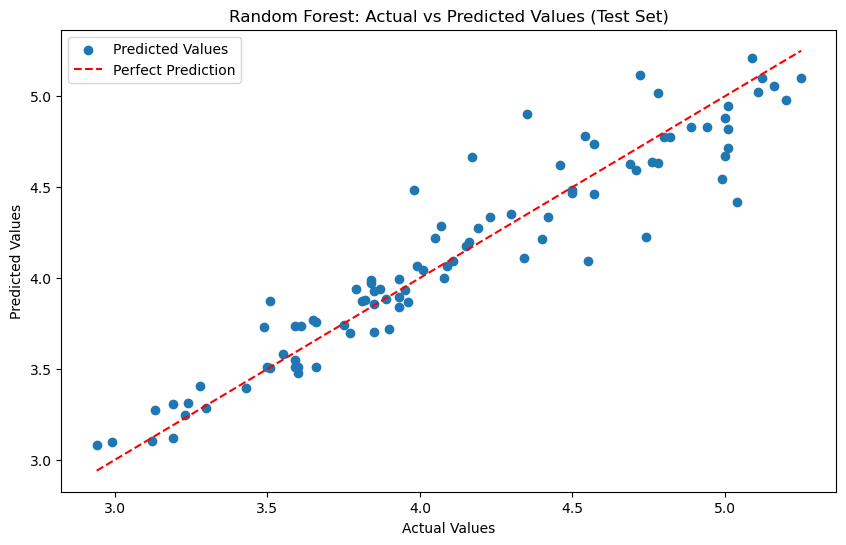

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1923889332327479
RAE: 0.2683580126554336
MAE: 0.13789239130434777
R2: 0.8987326029384918


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.06
Mean Squared Error on Test Set for Random Forest: 0.03


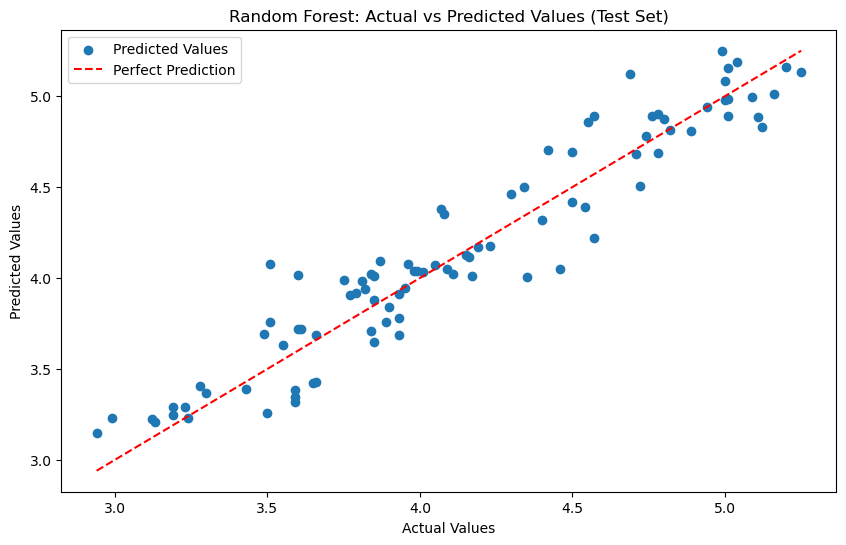

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18559642226218037
RAE: 0.2886972996836139
MAE: 0.14834347826086947
R2: 0.9057570929072484


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.00
Mean Squared Error on Test Set for XGBoost: 0.01


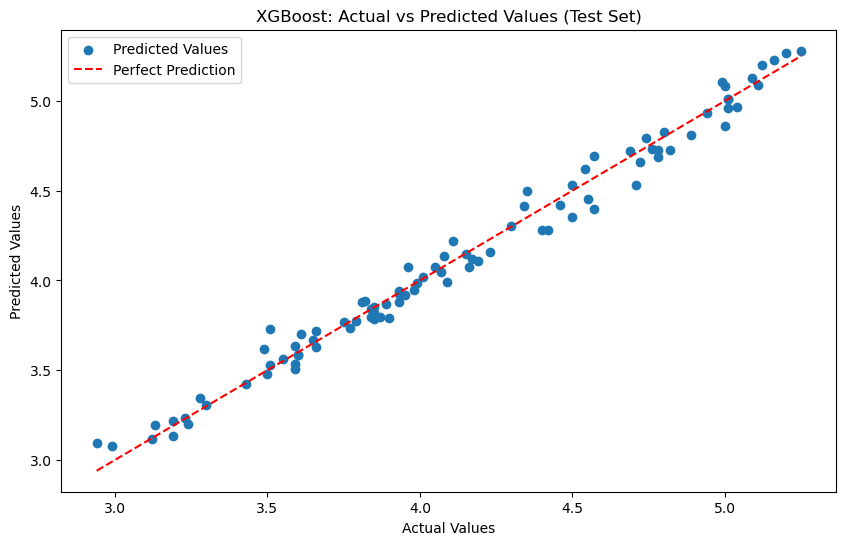

In [109]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [110]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07469877339651915
RAE: 0.11386657775996517
MAE: 0.05850890957790877
R2: 0.9847336078128747


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

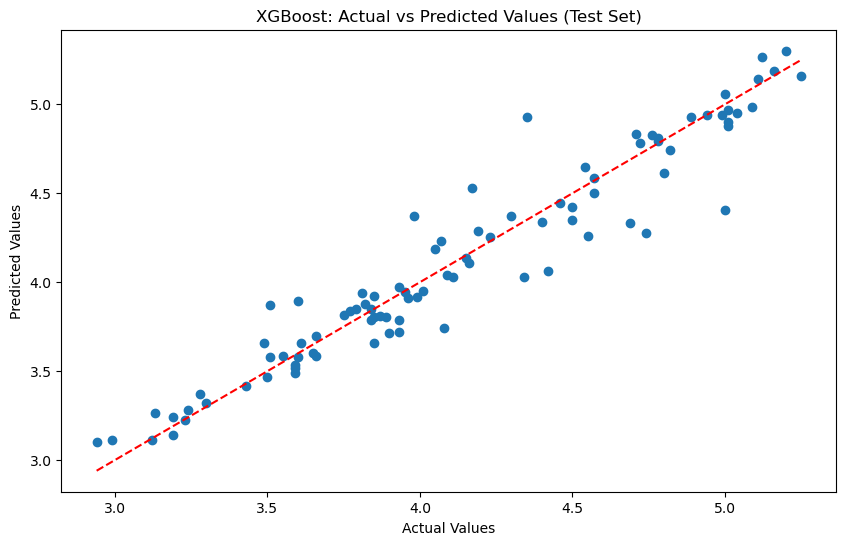

In [111]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [112]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16741596535477107
RAE: 0.22389387319563556
MAE: 0.11504505219666855
R2: 0.9233162721970811


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

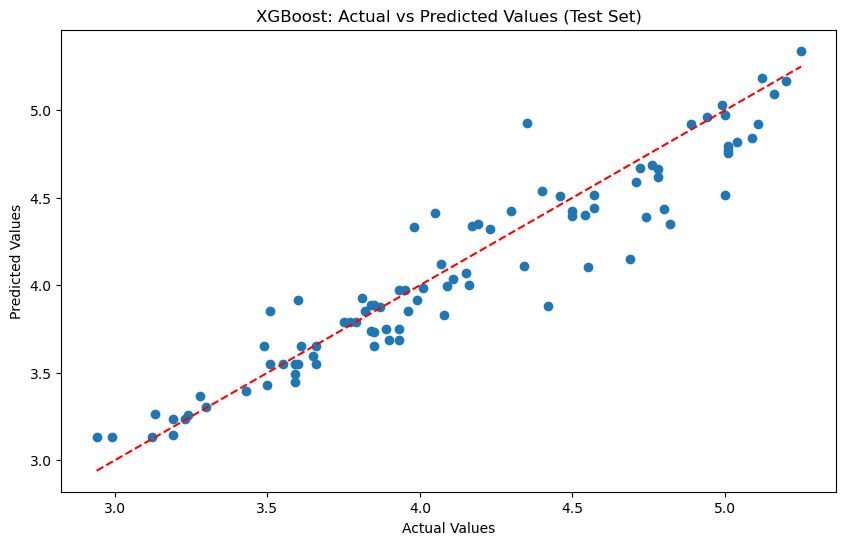

In [113]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [114]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19345139836173134
RAE: 0.27220721554785987
MAE: 0.13987025582272075
R2: 0.8976110190003264


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

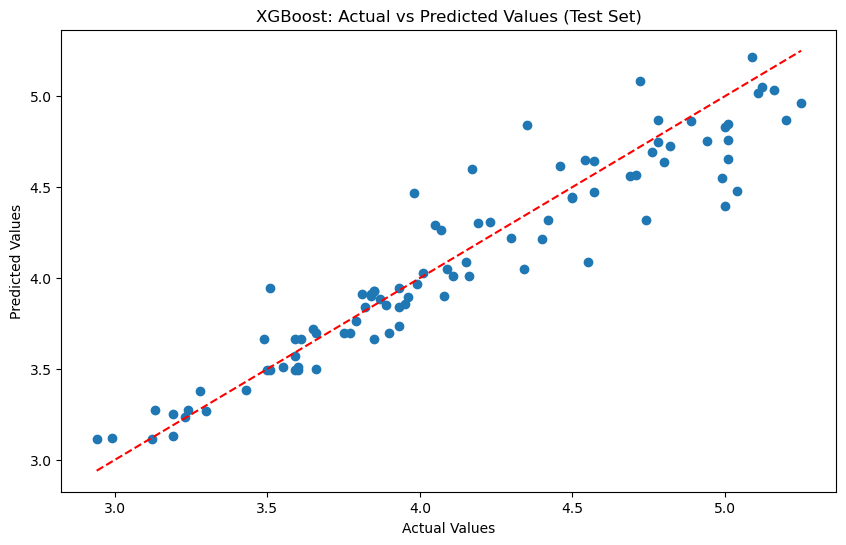

In [115]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [116]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1976782333972757
RAE: 0.2788131825313971
MAE: 0.14326464891433718
R2: 0.8930878221185065


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

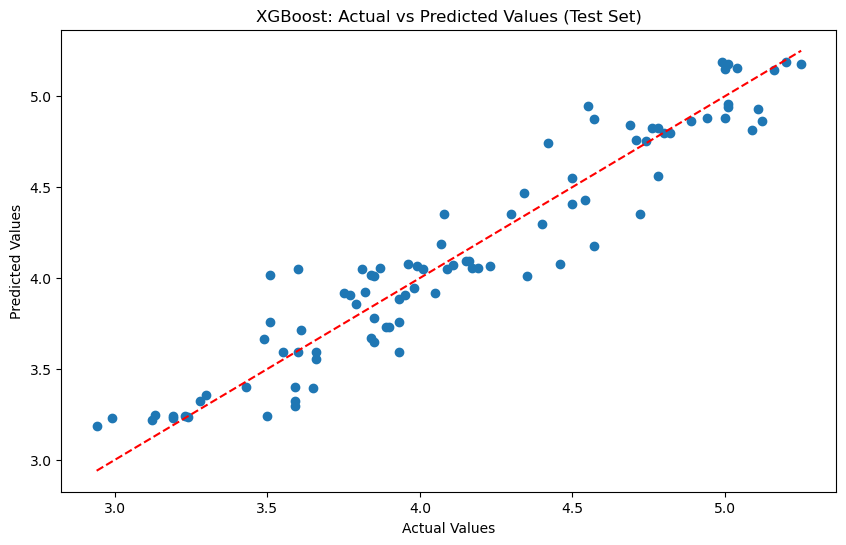

In [117]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [118]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18319041605977904
RAE: 0.28119067873494114
MAE: 0.14448629545128866
R2: 0.9081847180663448


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


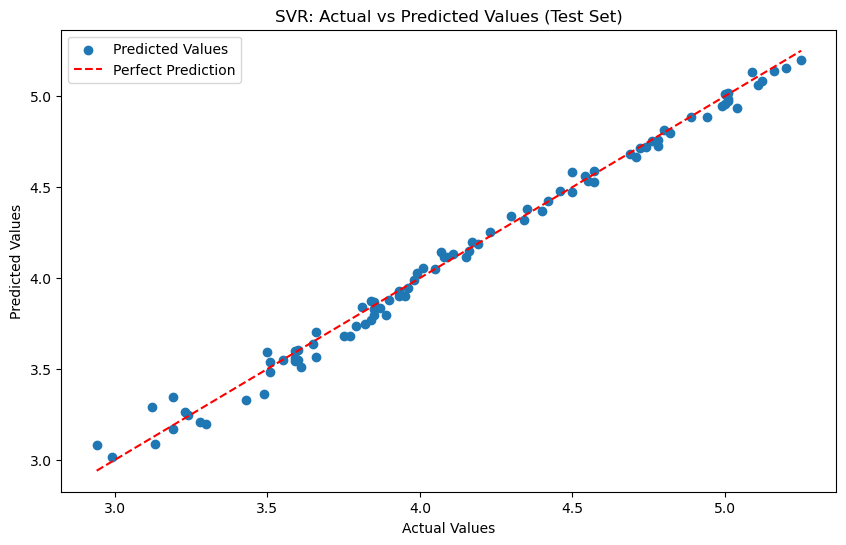

In [119]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [120]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.053793654206087914
RAE: 0.07972191344797955
MAE: 0.04096410304996182
R2: 0.9920828008756383


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


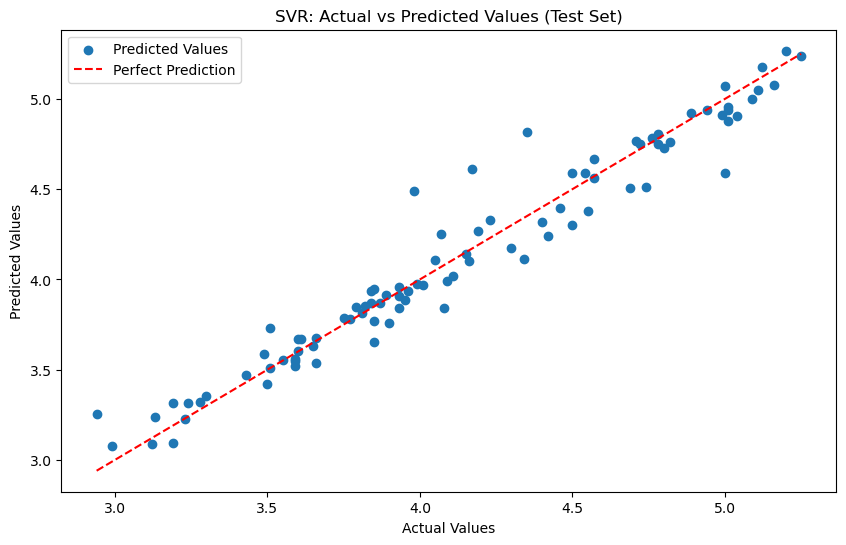

In [121]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [122]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13633802903450662
RAE: 0.1815050290110501
MAE: 0.09326407747785188
R2: 0.9491438479615228


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.03


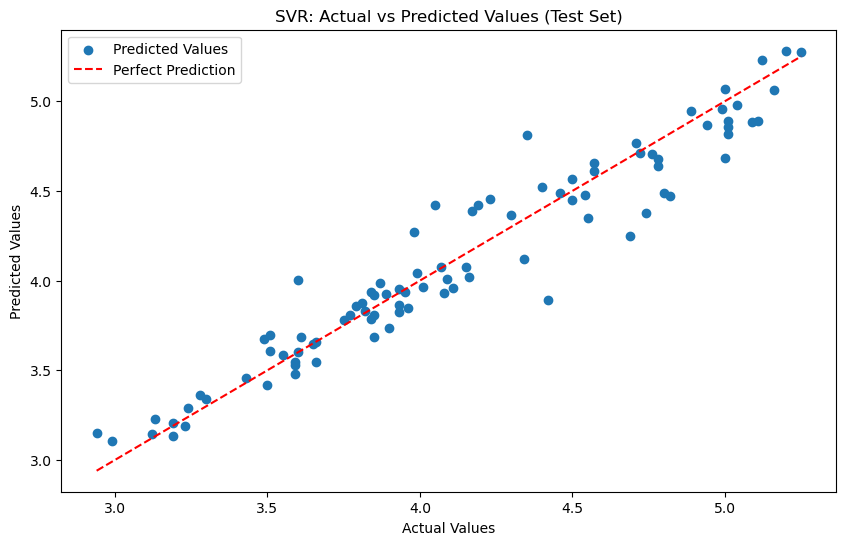

In [123]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [124]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16385479590349275
RAE: 0.23354745754128903
MAE: 0.12000542515855045
R2: 0.9265439131632471


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


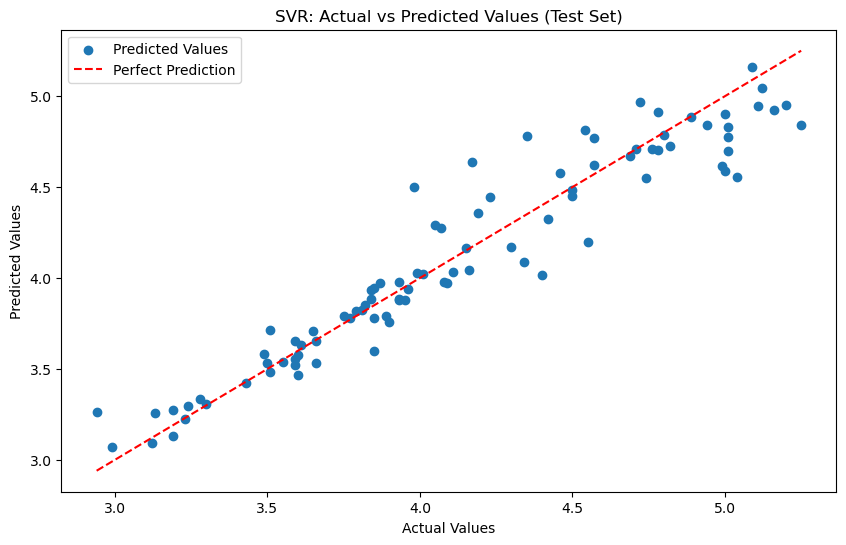

In [125]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [126]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1799969968624557
RAE: 0.2511187980554412
MAE: 0.1290342375943857
R2: 0.9113579089248769


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.04
Mean Squared Error on Test Set for SVR: 0.04


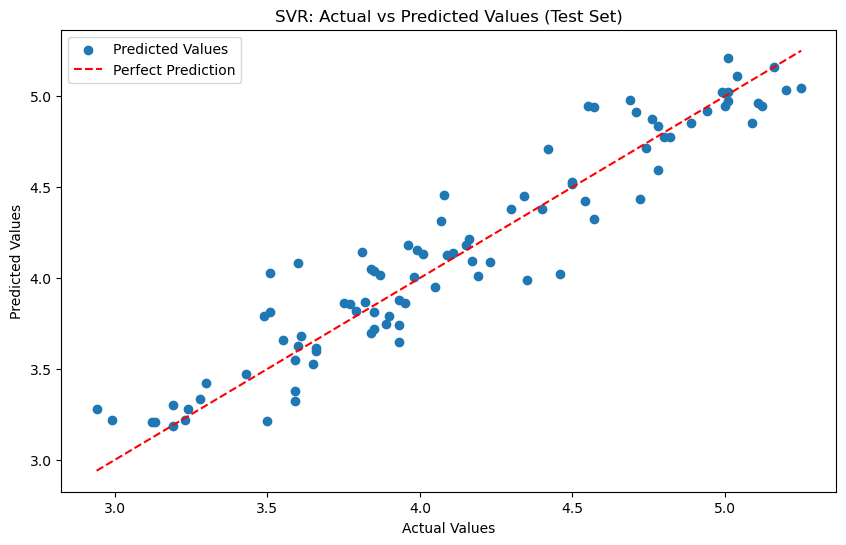

In [127]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [128]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18710918512951466
RAE: 0.2796849582083597
MAE: 0.14371259988694962
R2: 0.9042145180211181
